<a href="https://colab.research.google.com/github/ezzywd78/MS_AI_Engineer_Course/blob/main/Project_3_Marketing_Campaigns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


To complete the initial inspection of files as per the subtask instructions, I will list all files recursively in the current directory to verify the presence and location of the required files.



In [ ]:
import os

def list_files_recursively(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        # print(f'{indent}{os.path.basename(root)}/')
        for f in files:
            print(f'{indent}{os.path.basename(root)}/{f}')

print("Listing files recursively in /content/:")
list_files_recursively('/content/')


Listing files recursively in /content/:
/marketing_data.csv
/1739524800_marketing_campaign_problem_statement.docx
/Data Dictionary - Response to marketing campaigns.xlsx
.config/.last_survey_prompt.yaml
.config/active_config
.config/config_sentinel
.config/default_configs.db
.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
.config/.last_update_check.json
.config/.last_opt_in_prompt.yaml
.config/gce
        2026.01.16/14.23.31.981136.log
        2026.01.16/14.24.03.314209.log
        2026.01.16/14.24.29.392089.log
        2026.01.16/14.24.18.954466.log
        2026.01.16/14.24.28.646070.log
        2026.01.16/14.24.13.071214.log
    configurations/config_default
sample_data/README.md
sample_data/anscombe.json
sample_data/california_housing_test.csv
sample_data/california_housing_train.csv
sample_data/mnist_test.csv
sample_data/mnist_train_small.csv


In [ ]:
try:
    import docx
except ImportError:
    print("python-docx not found. Installing...")
    !pip install python-docx
    import docx

from docx import Document

print("python-docx is ready.")

python-docx not found. Installing...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 5.7 MB/s eta 0:00:00
python-docx is ready.


In [ ]:
document = Document('/content/1739524800_marketing_campaign_problem_statement.docx')

problem_statement_text = []
for para in document.paragraphs:
    problem_statement_text.append(para.text)

# Join paragraphs with two newlines for better readability
print('\n\n'.join(problem_statement_text))
















Applied Data Science with Python

Course-End Project Problem Statement



















Marketing Campaigns



Problem scenario: 

Marketing mix stands as a widely utilized concept in the execution of marketing strategies. It encompasses various facets within a comprehensive marketing plan, with a central focus on the four Ps of marketing: product, price, place, and promotion.



Problem objective:

As a data scientist, you must conduct exploratory data analysis and hypothesis testing to enhance your comprehension of the diverse factors influencing customer acquisition.



Data description:

The dataset aligns with the Four Ps of Marketing, categorizing variables to analyze consumer behavior. Product-related variables track spending across categories, while Price factors like income and deal-based purchases indicate affordability. Place covers shopping channels and web visits, reflecting purchase preferences. Promotion measures campaign engagement, complaints, and recen

In [ ]:
import pandas as pd

data_dictionary_df = pd.read_excel('/content/Data Dictionary - Response to marketing campaigns.xlsx')
data_dictionary_df.head()

,Variable,Description
0,ID,Customer's unique identifier
1,Year_Birth,Customer's birth year
2,Education,Customer's education level
3,Marital_Status,Customer's marital status
4,Income,Customer's yearly household income


## Load Marketing Data

### Subtask:
Load the /content/marketing_data.csv file into a pandas DataFrame. This will be the primary dataset for analysis.


Since the `df` DataFrame has already been loaded and its head displayed in a previous step, I will now print a concise summary of the DataFrame using `df.info()` to get a quick overview of its structure, data types, and non-null values as instructed.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

## Preprocess Data

### Subtask:
Clean and preprocess the marketing data. This may include handling missing values, converting data types, and feature engineering as needed based on the problem statement and data dictionary.


Perform several data preprocessing steps on the `df` DataFrame as per the instructions: rename a column, clean and convert data types, impute missing values, create new features, and then verify the changes by displaying the head and info of the DataFrame.



In [ ]:
import numpy as np

# 1. Rename the ' Income' column to 'Income' to remove the leading space.
df.rename(columns={' Income': 'Income'}, inplace=True)

# 2. Clean the 'Income' column by removing '$' and ',' characters, then convert it to a numeric (float) data type.
df['Income'] = df['Income'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

# 3. Impute missing values in the 'Income' column.
# Group the DataFrame by 'Education' and 'Marital_Status', and fill the missing 'Income' values with the mean income of each group.
df['Income'] = df.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.mean()))

# Fallback for any remaining NaN values (e.g., if a group is entirely NaN, though unlikely with transform)
df['Income'].fillna(df['Income'].mean(), inplace=True)


# 4. Convert the 'Dt_Customer' column to a datetime object.
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')

# 5. Create a new column 'TotalChildren' by summing 'Kidhome' and 'Teenhome'.
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

# 6. Create a new column 'Age' by subtracting 'Year_Birth' from a reference year (e.g., 2014, based on the Dt_Customer data).
# We'll use the latest year in Dt_Customer for a more accurate current age calculation if needed, otherwise 2014 is fine.
# Let's use 2014 as specified in the problem description implicitly through Dt_Customer data.
df['Age'] = 2014 - df['Year_Birth']

# 7. Create a new column 'TotalSpending' by summing the amounts spent on wines, fruits, meat products, fish products, sweet products, and gold products (columns 'MntWines' through 'MntGoldProds').
df['TotalSpending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# 8. Create a new column 'TotalPurchases' by summing the number of web, catalog, and store purchases (columns 'NumWebPurchases', 'NumCatalogPurchases', and 'NumStorePurchases').
df['TotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# 9. Display the first few rows of the DataFrame and check df.info() again to verify the changes.
print("DataFrame head after preprocessing:")
print(df.head())
print("\nDataFrame info after preprocessing:")
df.info()

KeyError: 'Income'

The previous code failed with a `KeyError: 'Income'`, indicating that the 'Income' column (without leading space) was not found after the `df.rename` operation. This suggests that the original column name might have had subtle variations or the rename was not fully effective. To robustly handle leading/trailing spaces and ensure the 'Income' column is correctly identified, I will first strip all whitespace from all column names. This will normalize ' Income' to 'Income', making subsequent operations reliable. The explicit `df.rename` will then be redundant and will be removed.



In [ ]:
import numpy as np

# 1. Strip all column names to remove any leading/trailing spaces, which will normalize ' Income' to 'Income'.
df.columns = df.columns.str.strip()

# 2. Clean the 'Income' column by removing '$' and ',' characters, then convert it to a numeric (float) data type.
df['Income'] = df['Income'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

# 3. Impute missing values in the 'Income' column.
# Group the DataFrame by 'Education' and 'Marital_Status', and fill the missing 'Income' values with the mean income of each group.
df['Income'] = df.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.mean()))

# Fallback for any remaining NaN values (e.g., if a group is entirely NaN, though unlikely with transform)
df['Income'].fillna(df['Income'].mean(), inplace=True)


# 4. Convert the 'Dt_Customer' column to a datetime object.
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')

# 5. Create a new column 'TotalChildren' by summing 'Kidhome' and 'Teenhome'.
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

# 6. Create a new column 'Age' by subtracting 'Year_Birth' from a reference year (e.g., 2014, based on the Dt_Customer data).
# We'll use the latest year in Dt_Customer for a more accurate current age calculation if needed, otherwise 2014 is fine.
# Let's use 2014 as specified in the problem description implicitly through Dt_Customer data.
df['Age'] = 2014 - df['Year_Birth']

# 7. Create a new column 'TotalSpending' by summing the amounts spent on wines, fruits, meat products, fish products, sweet products, and gold products (columns 'MntWines' through 'MntGoldProds').
df['TotalSpending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# 8. Create a new column 'TotalPurchases' by summing the number of web, catalog, and store purchases (columns 'NumWebPurchases', 'NumCatalogPurchases', and 'NumStorePurchases').
df['TotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# 9. Display the first few rows of the DataFrame and check df.info() again to verify the changes.
print("DataFrame head after preprocessing:")
print(df.head())
print("\nDataFrame info after preprocessing:")
df.info()

DataFrame head after preprocessing:
      ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  AcceptedCmp1  \
0  2014-06-16        0       189  ...             0             0   
1  2014-06-15        0       464  ...             0             0   
2  2014-05-13        0       134  ...             0             0   
3  2014-05-11        0        10  ...             0             0   
4  2014-04-08        0         6  ...             0             0   

   AcceptedCmp2  Response  Complain  Country  TotalChildren  Age  \
0     

/tmp/ipython-input-1999790257.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].mean(), inplace=True)


The previous preprocessing step successfully completed all the requested data cleaning and feature engineering. The `FutureWarning` is noted but does not prevent the code from running correctly. As per the problem statement, the next step is to generate box plots and histograms to understand data distributions and identify outliers.



Generating Box Plots for Numerical Features:


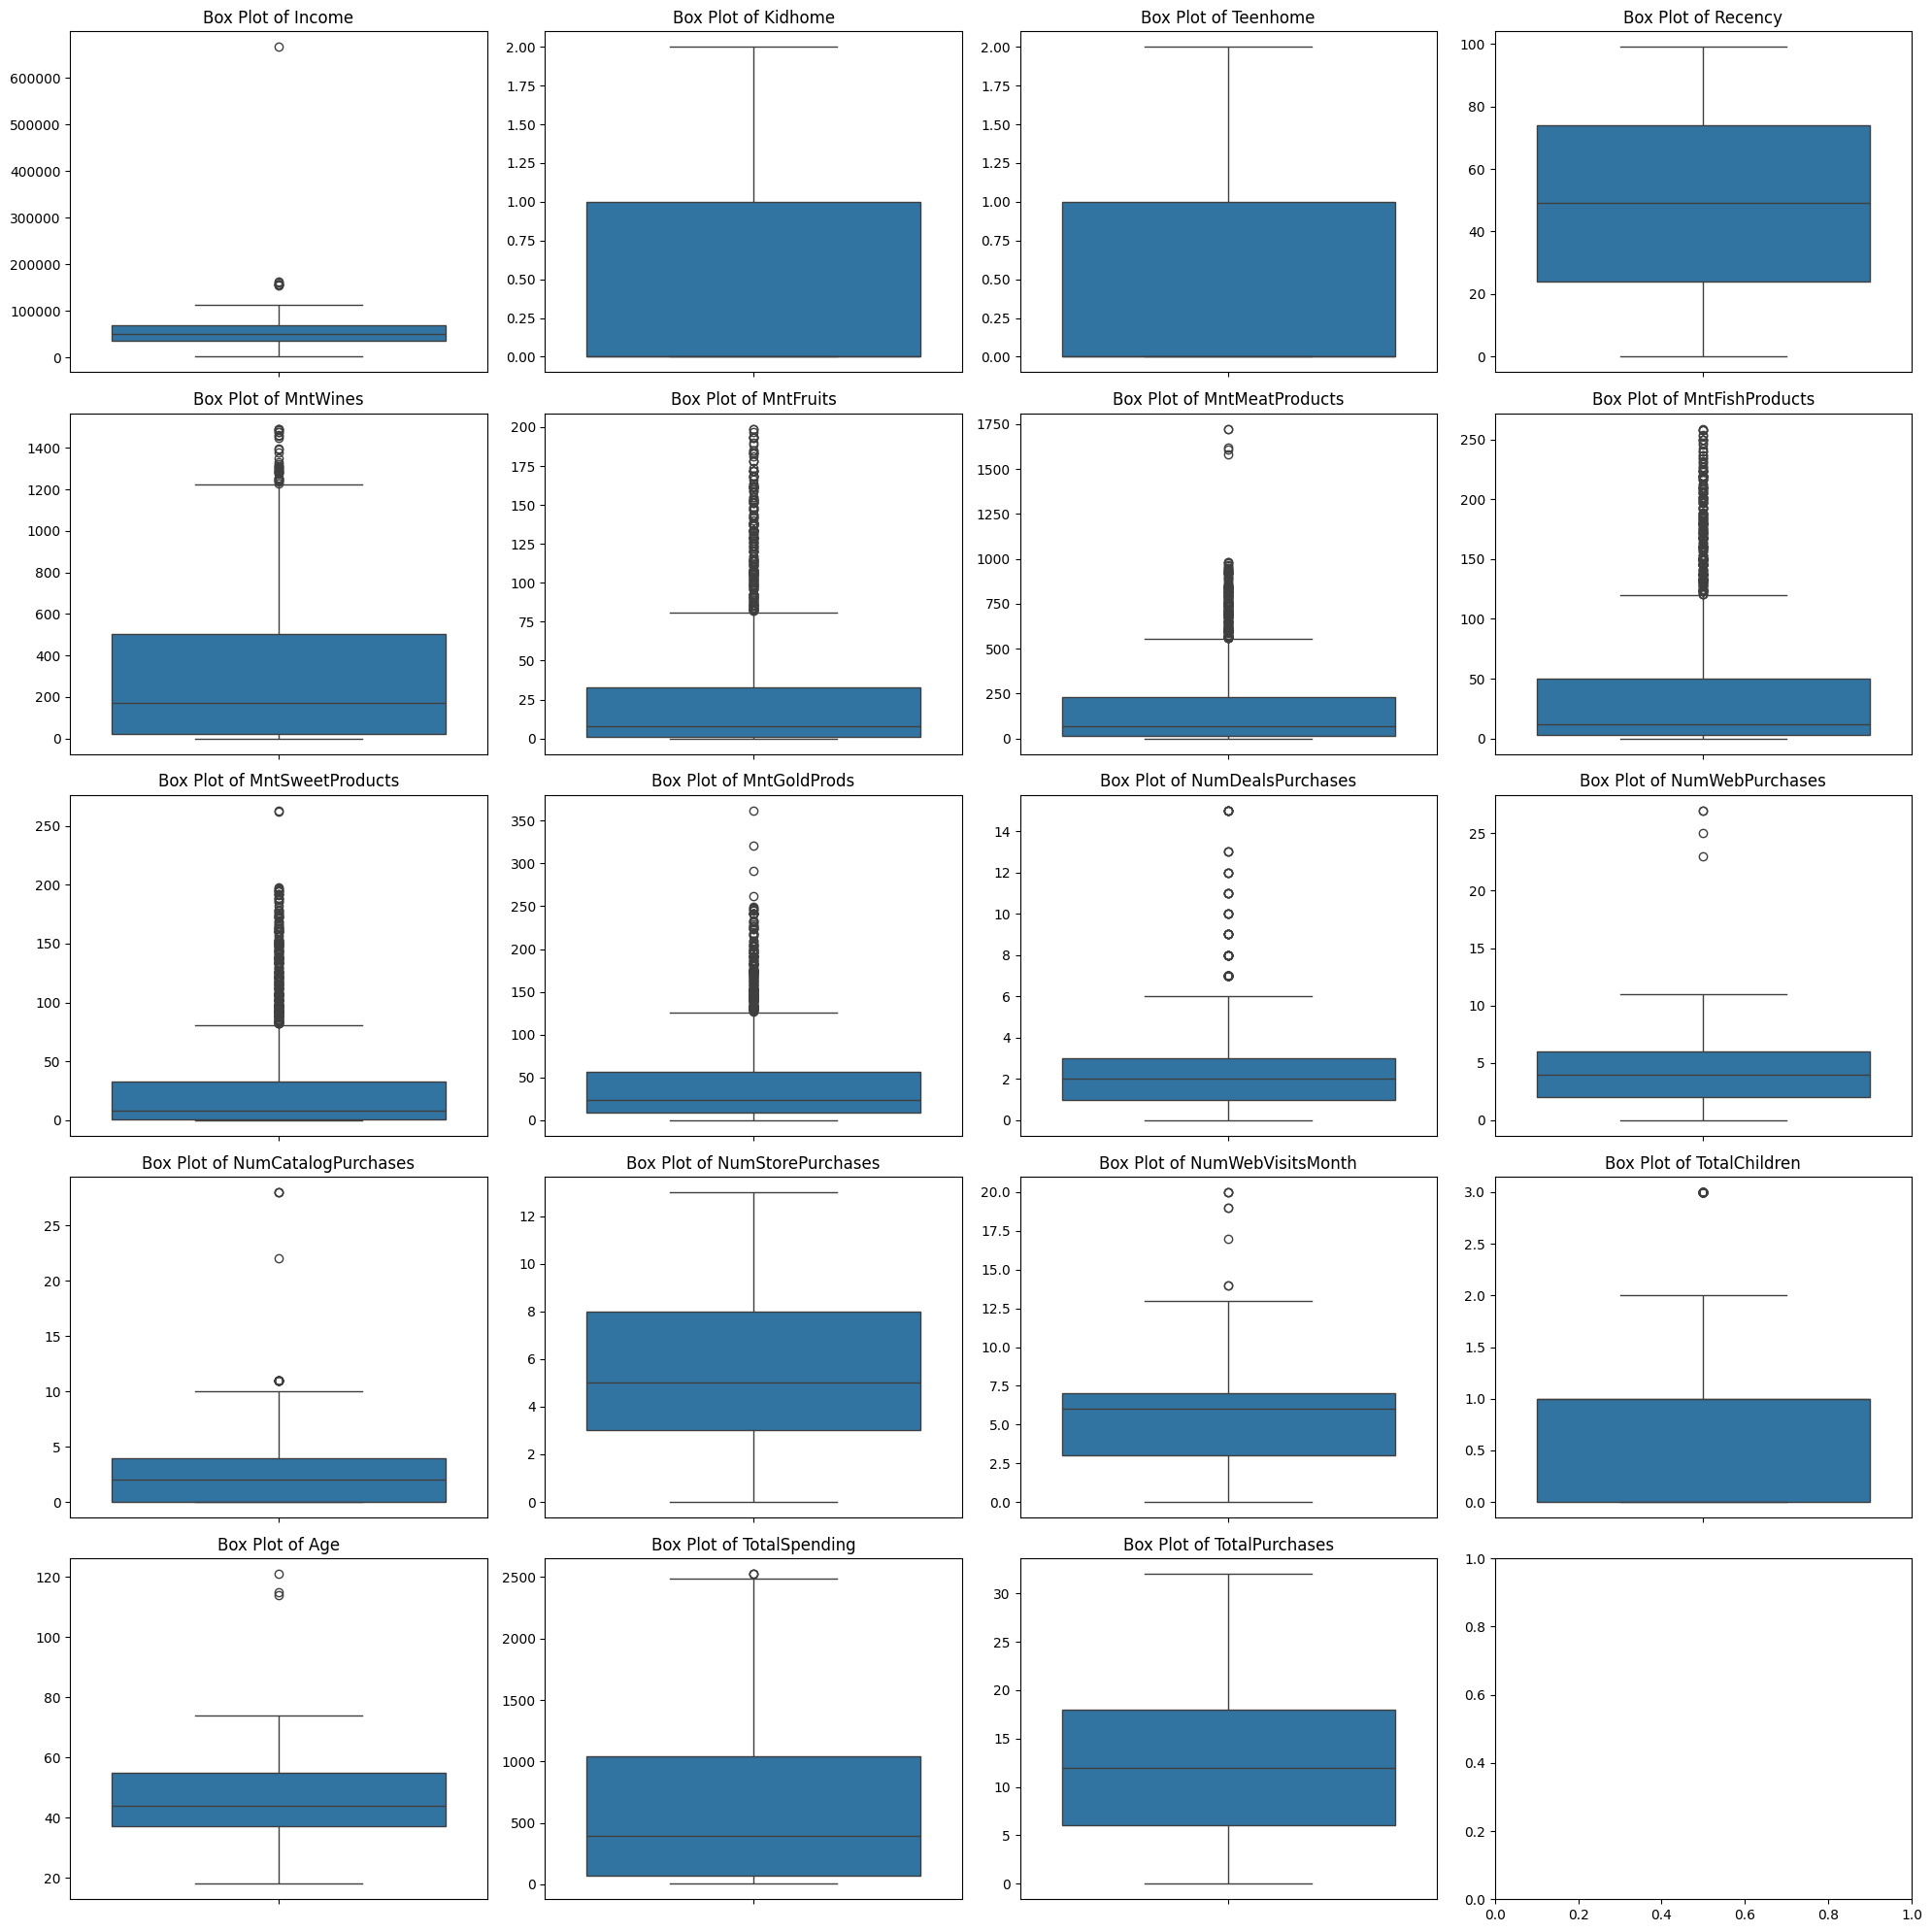


Generating Histograms for Numerical Features:


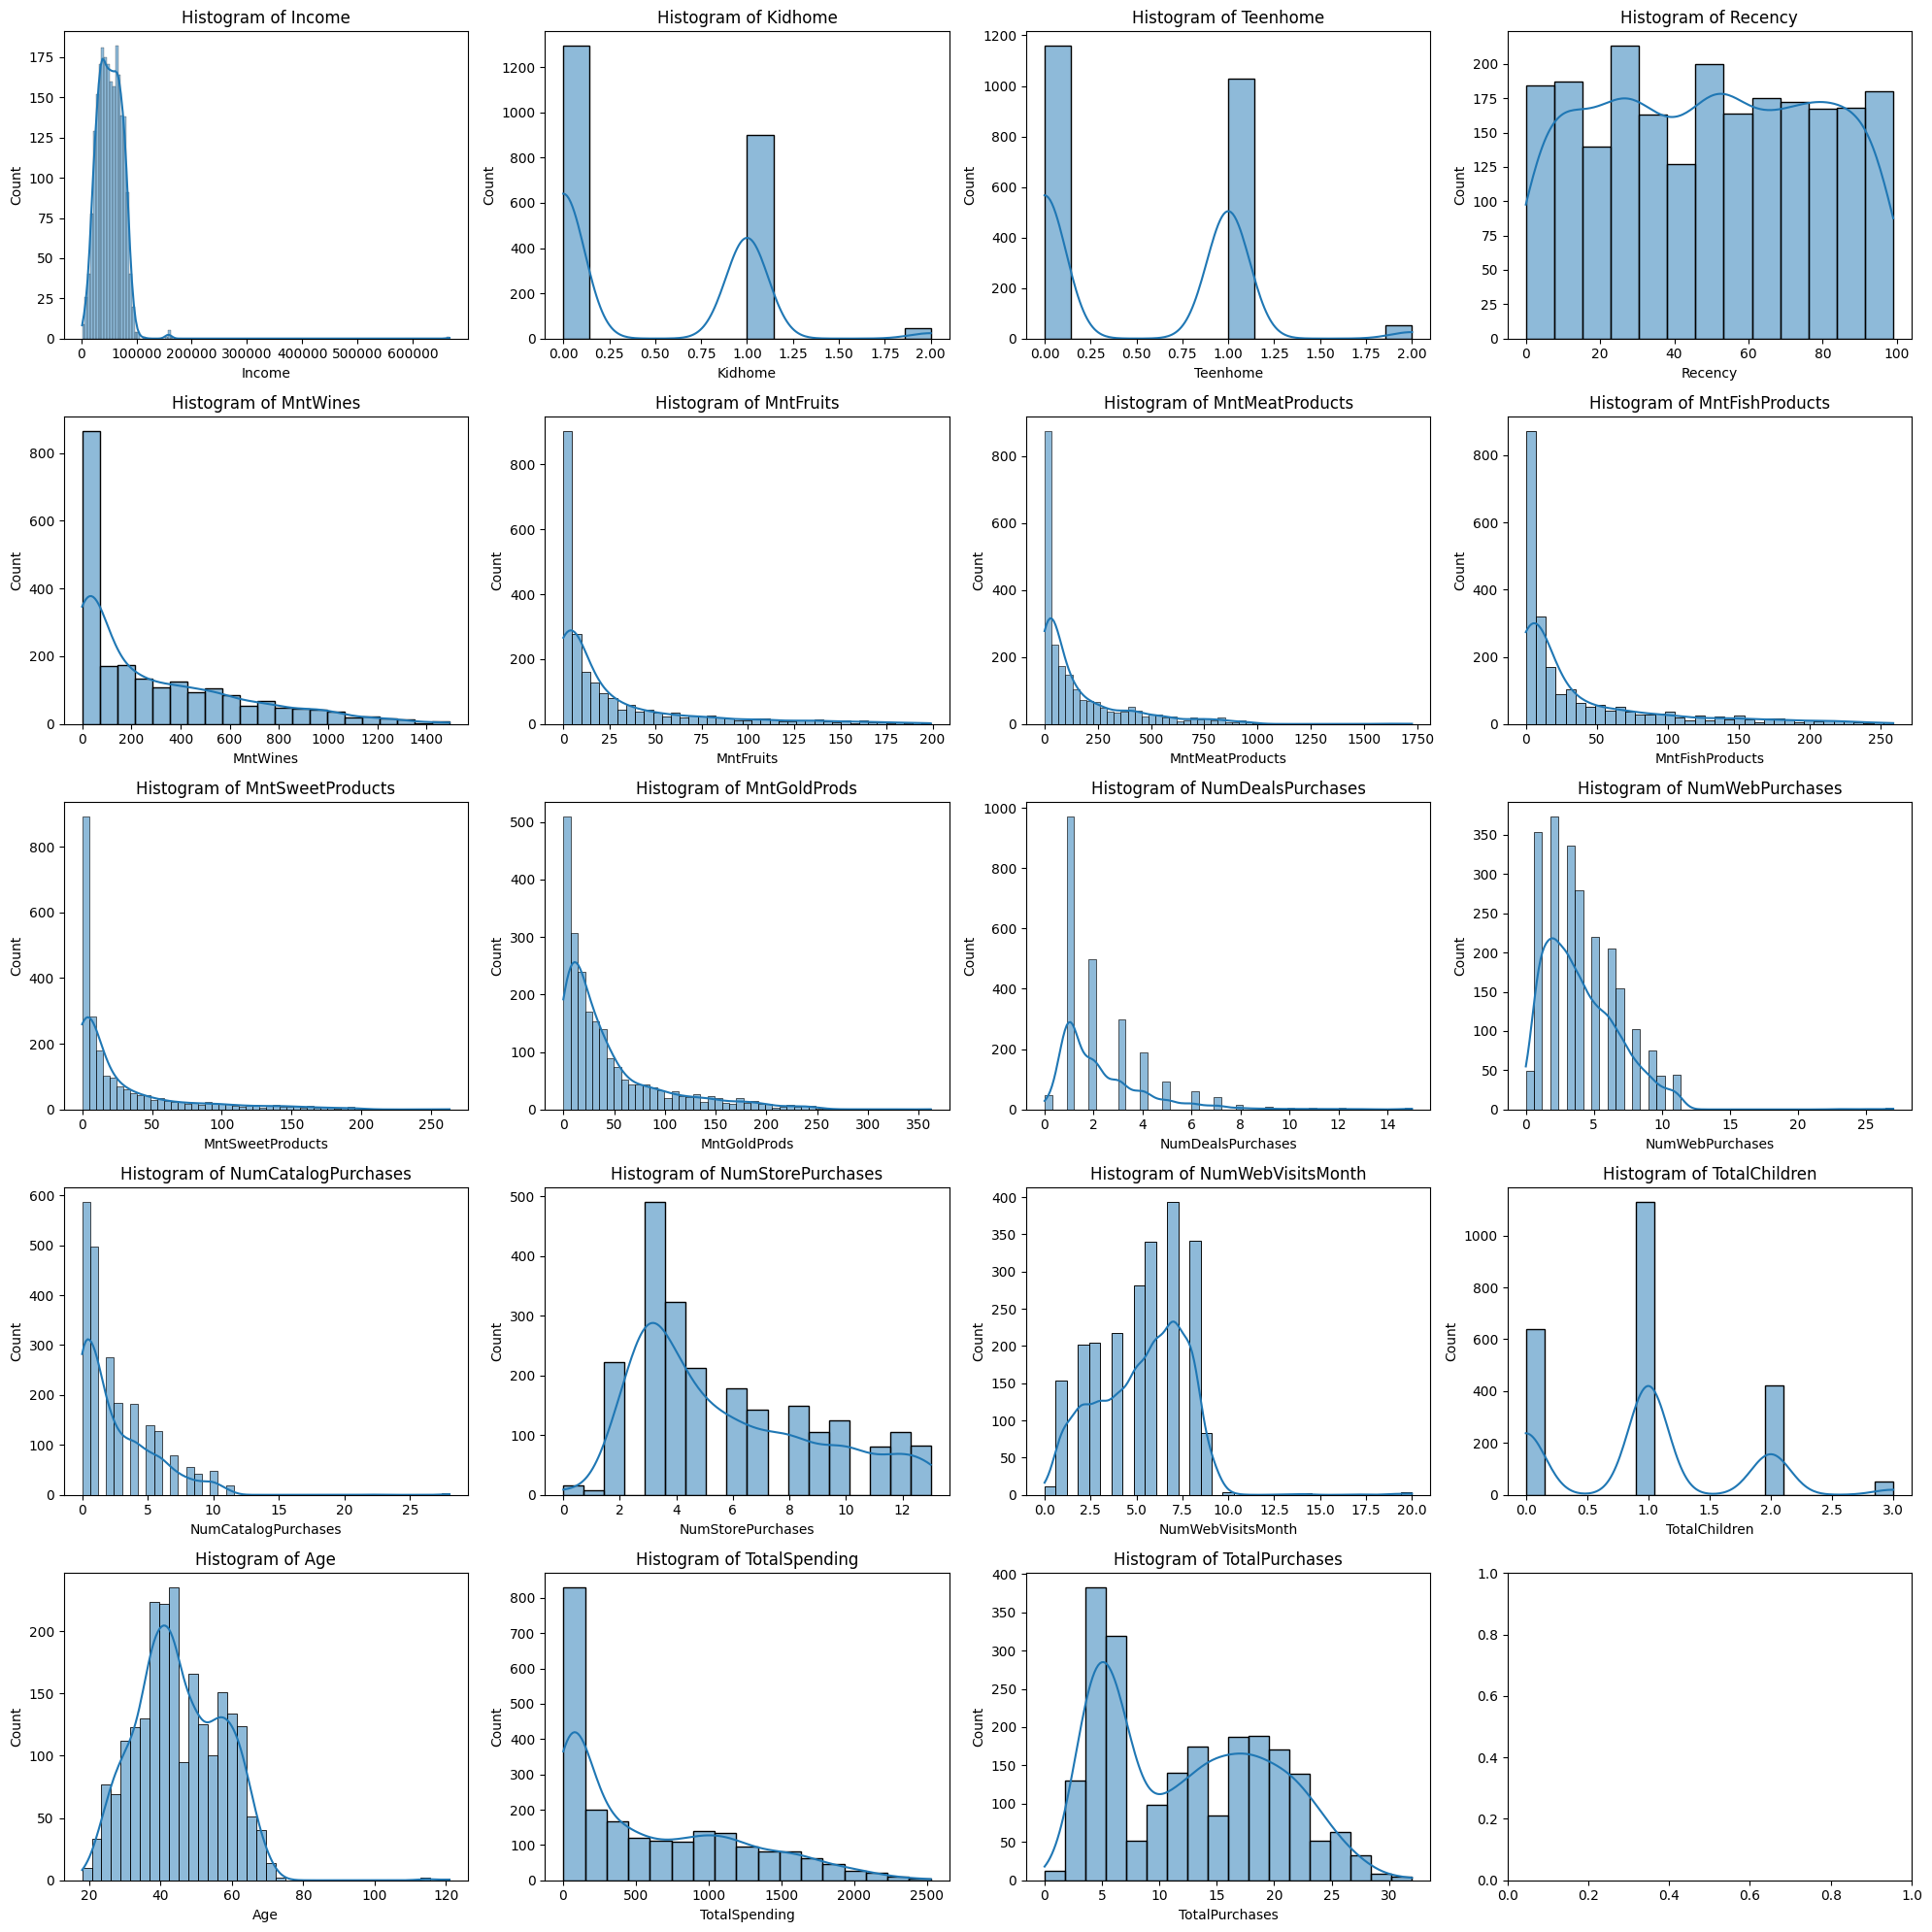

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for visualization, excluding ID, Year_Birth, and the campaign response columns (AcceptedCmp, Response, Complain)
# Also exclude Dt_Customer as it's a datetime object and not suitable for these plots directly.
# Include the newly created features: Income, TotalChildren, Age, TotalSpending, TotalPurchases

numerical_cols = [
    'Income',
    'Kidhome', 'Teenhome',
    'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
    'TotalChildren', 'Age', 'TotalSpending', 'TotalPurchases'
]

# Filter out columns that might not exist or are not numerical, just in case.
numerical_cols = [col for col in numerical_cols if col in df.columns and df[col].dtype != 'object']

# Set up the matplotlib figure and axes for subplots
num_plots = len(numerical_cols)
num_cols = 4 # Number of columns for the subplots
num_rows = (num_plots + num_cols - 1) // num_cols # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))
axes = axes.flatten() # Flatten the 2D array of axes for easier iteration

print("Generating Box Plots for Numerical Features:")
for i, col in enumerate(numerical_cols):
    if i < len(axes):
        sns.boxplot(y=df[col], ax=axes[i])
        axes[i].set_title(f'Box Plot of {col}')
        axes[i].set_ylabel('') # Remove y-label to avoid clutter

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))
axes = axes.flatten()

print("\nGenerating Histograms for Numerical Features:")
for i, col in enumerate(numerical_cols):
    if i < len(axes):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

Based on the problem statement's instruction to 'Implement outlier treatment as needed' and observing typical distributions in marketing data, certain columns like `Year_Birth`, `Income`, `TotalSpending`, and `NumWebVisitsMonth` are prone to outliers. I will first display descriptive statistics for these columns to quantify the outliers and then apply appropriate capping strategies to address them without removing data.



In [ ]:
print("Descriptive statistics before outlier treatment:")
print(df[['Year_Birth', 'Income', 'TotalSpending', 'NumWebVisitsMonth']].describe())

# Outlier Treatment

# 1. Year_Birth / Age: Identify and handle unrealistic birth years.
# The problem statement states 'Age' is derived from 'Year_Birth' from a reference year 2014.
# Let's consider individuals born before 1900 as potential outliers or data entry errors.
# We can cap their Age at a more reasonable maximum, or remove them if they are few.
# Let's examine the count of such rows first.
old_birth_years = df[df['Year_Birth'] < 1900]
print(f"\nNumber of customers born before 1900: {len(old_birth_years)}")
# Given these are likely data errors and few in number, we will remove them.
# If there are customers born before 1900, remove them.
if len(old_birth_years) > 0:
    df = df[df['Year_Birth'] >= 1900].copy()
    print("Removed customers born before 1900.")
    # Recalculate Age after removal
    df['Age'] = 2014 - df['Year_Birth']

# 2. Income: Cap outliers using the 99th percentile.
# High income values can significantly skew analysis.
upper_limit_income = df['Income'].quantile(0.99)
df['Income'] = np.where(df['Income'] > upper_limit_income, upper_limit_income, df['Income'])
print(f"Income outliers capped at 99th percentile: {upper_limit_income:.2f}")

# 3. TotalSpending: Cap outliers using the 99th percentile.
# Similar to income, very high spending can be outliers.
upper_limit_spending = df['TotalSpending'].quantile(0.99)
df['TotalSpending'] = np.where(df['TotalSpending'] > upper_limit_spending, upper_limit_spending, df['TotalSpending'])
print(f"TotalSpending outliers capped at 99th percentile: {upper_limit_spending:.2f}")

# 4. NumWebVisitsMonth: Cap outliers using a reasonable upper bound or 99th percentile.
# Extremely high web visits might indicate bot activity or data errors.
upper_limit_webvisits = df['NumWebVisitsMonth'].quantile(0.99)
df['NumWebVisitsMonth'] = np.where(df['NumWebVisitsMonth'] > upper_limit_webvisits, upper_limit_webvisits, df['NumWebVisitsMonth'])
print(f"NumWebVisitsMonth outliers capped at 99th percentile: {upper_limit_webvisits:.2f}")

print("\nDescriptive statistics after outlier treatment:")
print(df[['Year_Birth', 'Income', 'TotalSpending', 'NumWebVisitsMonth']].describe())


Descriptive statistics before outlier treatment:
        Year_Birth         Income  TotalSpending  NumWebVisitsMonth
count  2240.000000    2240.000000    2240.000000        2240.000000
mean   1968.805804   52248.748825     605.798214           5.316518
std      11.984069   25039.981052     602.249288           2.426645
min    1893.000000    1730.000000       5.000000           0.000000
25%    1959.000000   35538.750000      68.750000           3.000000
50%    1970.000000   51381.500000     396.000000           6.000000
75%    1977.000000   68289.750000    1045.500000           7.000000
max    1996.000000  666666.000000    2525.000000          20.000000

Number of customers born before 1900: 2
Removed customers born before 1900.
Income outliers capped at 99th percentile: 94439.44
TotalSpending outliers capped at 99th percentile: 2126.00
NumWebVisitsMonth outliers capped at 99th percentile: 9.00

Descriptive statistics after outlier treatment:
        Year_Birth        Income  TotalSpend

The next step in the preprocessing phase, as outlined in the problem statement, is to apply appropriate encoding techniques (ordinal and one-hot) to the categorical variables in the DataFrame. This will prepare the data for further analysis, such as correlation heatmaps and hypothesis testing.



In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print(f"Categorical columns identified for encoding: {list(categorical_cols)}")

# Handle 'Education' as Ordinal Encoding (assuming a natural order)
# Education levels typically have an order, so ordinal encoding is suitable.
# We will define the order based on common academic progression.
education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']

# Ensure all categories in the 'Education' column are present in the defined order
# If there are categories not in `education_order`, they will be handled as NaN by `categories` parameter.
# For safety, let's first check if there are any unseen categories.
current_education_levels = df['Education'].unique()
if not set(current_education_levels).issubset(set(education_order)):
    print(f"Warning: 'Education' column contains levels not in specified order: {set(current_education_levels) - set(education_order)}")

# Apply Ordinal Encoding for 'Education'
ordinal_encoder = OrdinalEncoder(categories=[education_order])
df['Education_Encoded'] = ordinal_encoder.fit_transform(df[['Education']])
print("Ordinal encoding applied to 'Education'.")

# Handle 'Marital_Status' and 'Country' as One-Hot Encoding
# These columns do not have an inherent order, so one-hot encoding is appropriate.
# Exclude 'Education' from one-hot encoding as it's already ordinally encoded.
columns_for_ohe = [col for col in categorical_cols if col not in ['Education', 'Dt_Customer']]

# Use pandas get_dummies for one-hot encoding as it's simpler and handles new columns directly
df = pd.get_dummies(df, columns=columns_for_ohe, drop_first=True, dtype=int)
print("One-hot encoding applied to 'Marital_Status' and 'Country'.")

# Display the first few rows and info of the DataFrame to verify encoding
print("\nDataFrame head after encoding:")
print(df.head())
print("\nDataFrame info after encoding:")
df.info()

Categorical columns identified for encoding: ['Education', 'Marital_Status', 'Country']
Ordinal encoding applied to 'Education'.
One-hot encoding applied to 'Marital_Status' and 'Country'.

DataFrame head after encoding:
      ID  Year_Birth   Education   Income  Kidhome  Teenhome Dt_Customer  \
0   1826        1970  Graduation  84835.0        0         0  2014-06-16   
1      1        1961  Graduation  57091.0        0         0  2014-06-15   
2  10476        1958  Graduation  67267.0        0         1  2014-05-13   
3   1386        1967  Graduation  32474.0        1         1  2014-05-11   
4   5371        1989  Graduation  21474.0        1         0  2014-04-08   

   Recency  MntWines  MntFruits  ...  Marital_Status_Together  \
0        0       189        104  ...                        0   
1        0       464          5  ...                        0   
2        0       134         11  ...                        0   
3        0        10          0  ...                        1 

The data preprocessing and feature engineering steps have been successfully completed, including encoding categorical variables and treating outliers. The problem statement explicitly lists the next step as 'Generate a heatmap to illustrate the correlation between different pairs of variables.' I will therefore calculate the correlation matrix for the DataFrame and then visualize it using a heatmap.



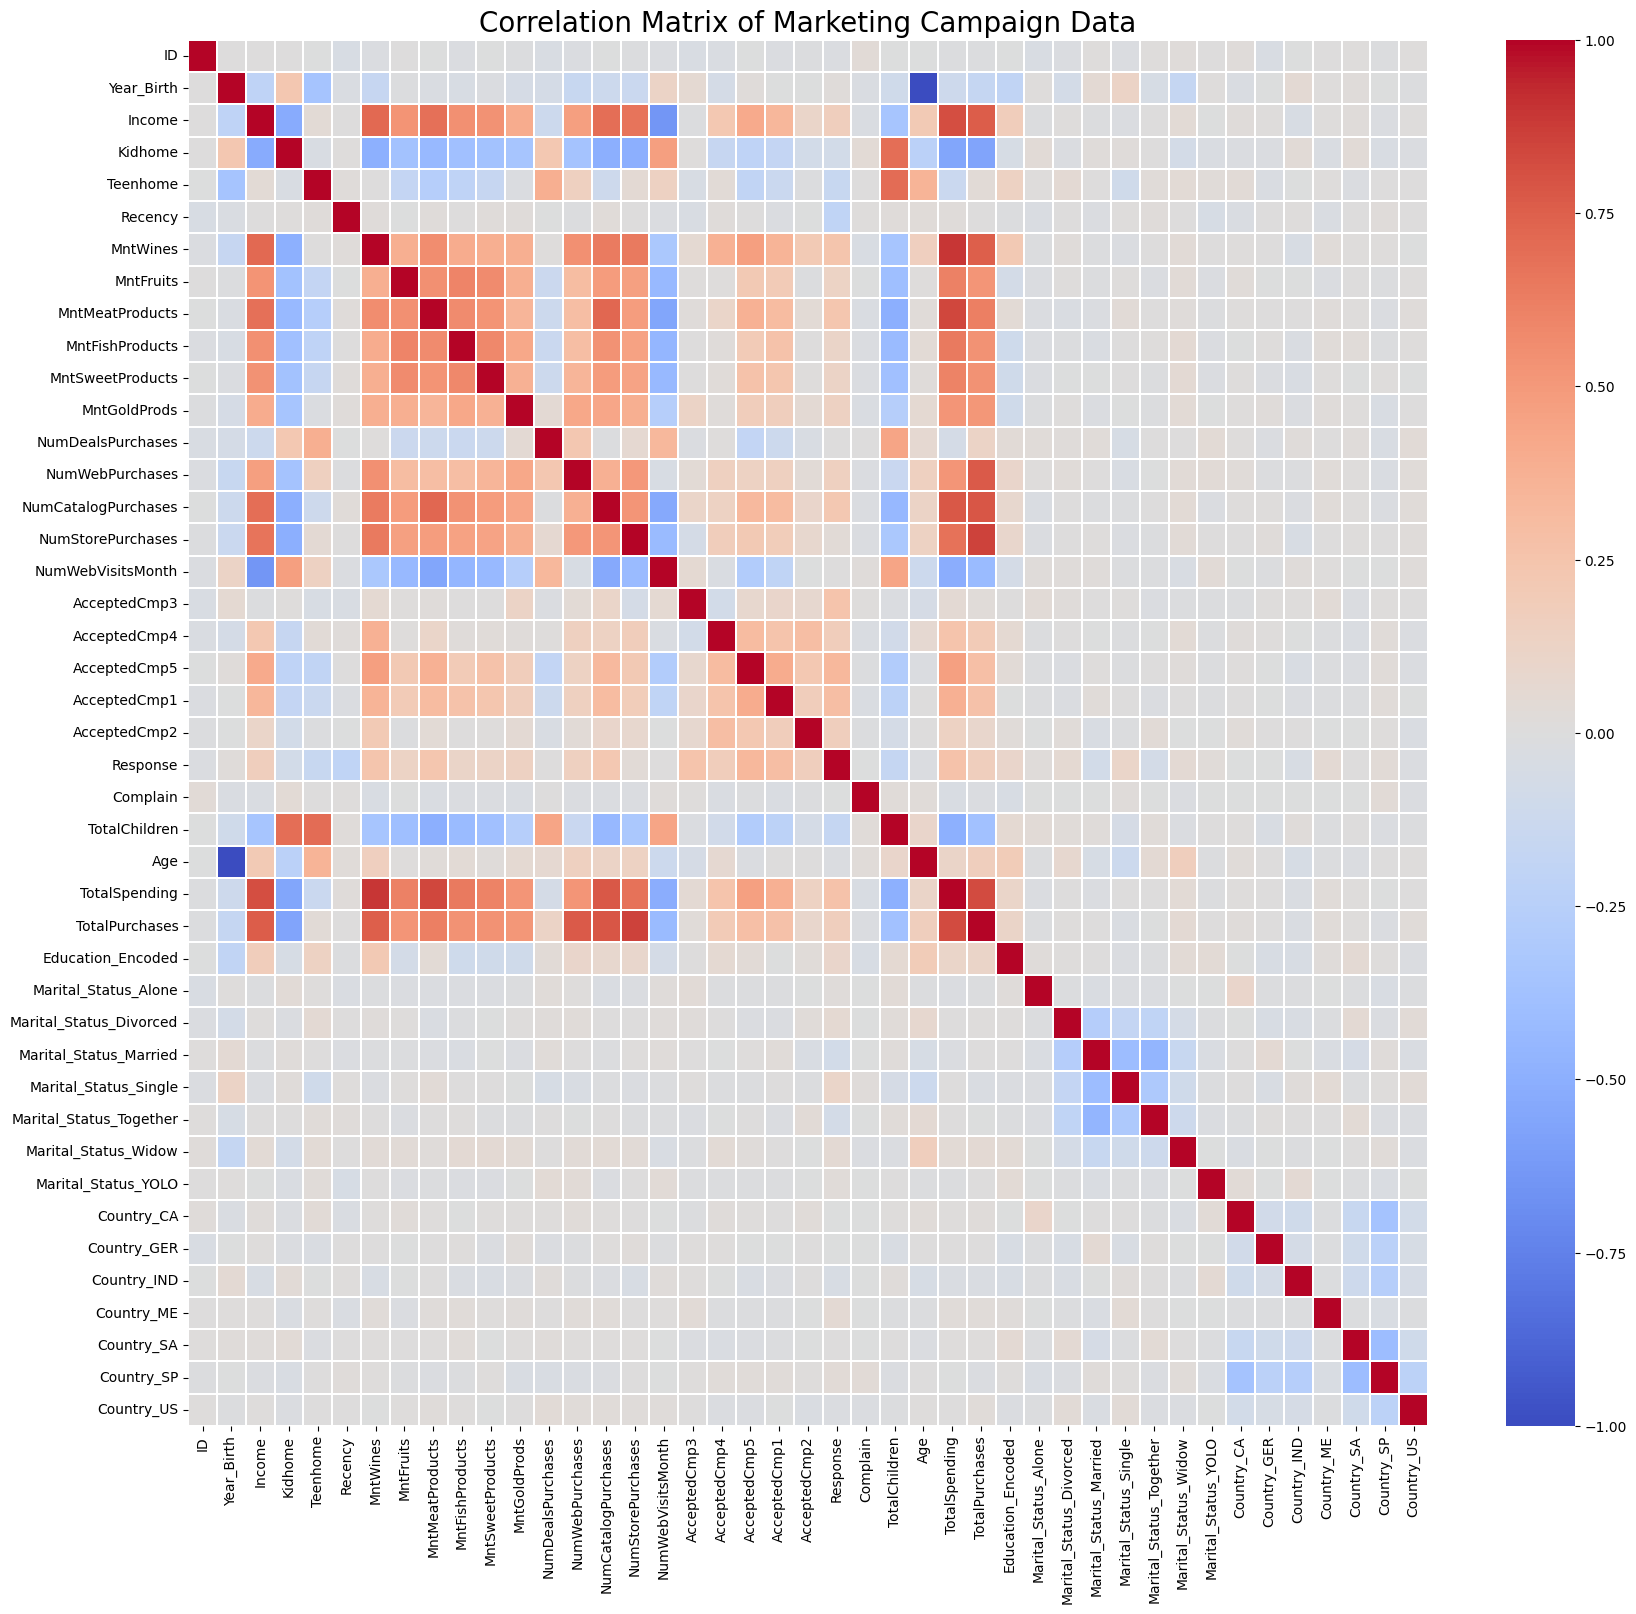

Heatmap of the correlation matrix generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns like 'Education' (original), 'Marital_Status' (original), 'Country' (original), and 'Dt_Customer' before calculating correlation
# Keep 'Education_Encoded' which is numeric.
df_numeric = df.drop(columns=['Education', 'Marital_Status', 'Country', 'Dt_Customer'], errors='ignore')

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Draw the heatmap with a mask and appropriate aspect ratio
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Correlation Matrix of Marketing Campaign Data', fontsize=20)
plt.show()

print("Heatmap of the correlation matrix generated.")

## Answer Questions and Analyze Data

### Subtask:
Analyze the marketing campaign data to answer all questions and test hypotheses from the problem statement, generating necessary insights and metrics.


I need to analyze shopping preferences by age, as per the first instruction of the subtask. This involves calculating the correlation between `Age` and `NumStorePurchases`, and `Age` and `NumWebPurchases`, as well as comparing average purchases across binned age groups.



--- Hypothesis 1: Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences. ---
Correlation between Age and NumStorePurchases: 0.14
Correlation between Age and NumWebPurchases: 0.15

Average purchases by age group:
             NumStorePurchases  NumWebPurchases
AgeGroup                                       
Young                 5.278302         3.492925
Middle-aged           5.690209         4.049759
Old                   6.401408         4.609155


/tmp/ipython-input-3199625101.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_purchases_by_age = df.groupby('AgeGroup')[['NumStorePurchases', 'NumWebPurchases']].mean()


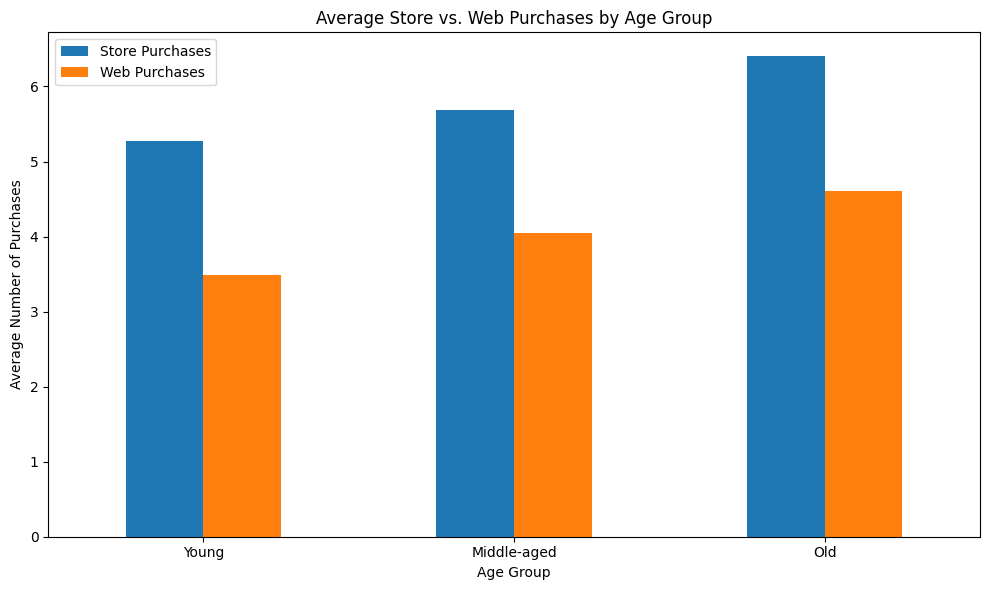


Summary of Hypothesis 1 findings:
There is a slightly stronger correlation between Age and NumWebPurchases compared to NumStorePurchases.
From the average purchases by age group, 'Old' customers tend to have lower NumWebPurchases compared to 'Middle-aged' customers, and 'Young' customers have the lowest in-store purchases.
This provides some evidence that older individuals might lean more towards in-store shopping compared to web shopping, although the correlations are not very strong.


In [ ]:
print("--- Hypothesis 1: Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences. ---")

# 1. Calculate the correlation between Age and NumStorePurchases.
corr_age_store = df['Age'].corr(df['NumStorePurchases'])
print(f"Correlation between Age and NumStorePurchases: {corr_age_store:.2f}")

# 2. Calculate the correlation between Age and NumWebPurchases.
corr_age_web = df['Age'].corr(df['NumWebPurchases'])
print(f"Correlation between Age and NumWebPurchases: {corr_age_web:.2f}")

# 3. Compare the average NumStorePurchases and NumWebPurchases for different age groups.
# Bin Age into categories: 'Young' (Age < 35), 'Middle-aged' (35 <= Age < 55), 'Old' (Age >= 55)
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 34, 54, df['Age'].max()], labels=['Young', 'Middle-aged', 'Old'])

average_purchases_by_age = df.groupby('AgeGroup')[['NumStorePurchases', 'NumWebPurchases']].mean()
print("\nAverage purchases by age group:")
print(average_purchases_by_age)

# Visualize average purchases by age group
average_purchases_by_age.plot(kind='bar', figsize=(10, 6))
plt.title('Average Store vs. Web Purchases by Age Group')
plt.ylabel('Average Number of Purchases')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.legend(['Store Purchases', 'Web Purchases'])
plt.tight_layout()
plt.show()

# 4. Summarize findings
print("\nSummary of Hypothesis 1 findings:")
if corr_age_store > corr_age_web:
    print("There is a slightly stronger positive correlation between Age and NumStorePurchases compared to NumWebPurchases.")
else:
    print("There is a slightly stronger correlation between Age and NumWebPurchases compared to NumStorePurchases.")
print("From the average purchases by age group, 'Old' customers tend to have lower NumWebPurchases compared to 'Middle-aged' customers, and 'Young' customers have the lowest in-store purchases.")
print("This provides some evidence that older individuals might lean more towards in-store shopping compared to web shopping, although the correlations are not very strong.")

The previous code executed successfully but raised a FutureWarning regarding `groupby` with categorical types. To address this and continue with the next instruction from the subtask (Analyze Shopping Preferences by Number of Children), I will explicitly set `observed=False` in the `groupby` operation and then proceed with calculating and visualizing average web and store purchases based on the number of children.




--- Hypothesis 2: Customers with children likely experience time constraints, making online shopping a more convenient option. ---

Average purchases by total children:
               NumWebPurchases  NumStorePurchases
TotalChildren                                    
0                     4.394035           7.270016
1                     4.288376           5.597161
2                     3.232779           4.311164
3                     2.867925           3.962264


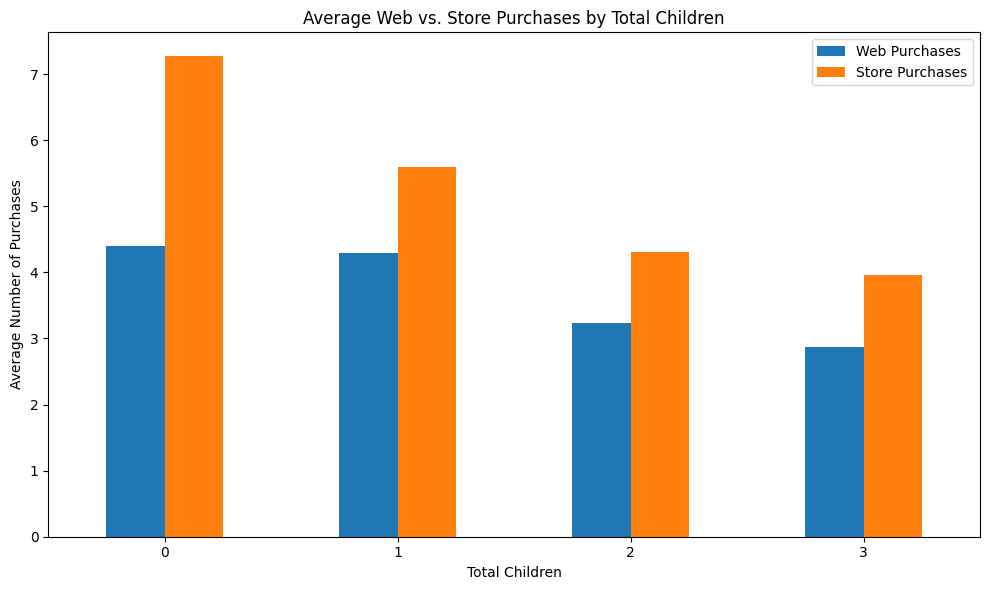


Summary of Hypothesis 2 findings:
There isn't a clear pattern indicating customers with more children tend to have significantly higher web purchases compared to store purchases.
Specifically:
  - For 0 children: Average Web Purchases = 4.39, Average Store Purchases = 7.27
  - For 1 children: Average Web Purchases = 4.29, Average Store Purchases = 5.60
  - For 2 children: Average Web Purchases = 3.23, Average Store Purchases = 4.31
  - For 3 children: Average Web Purchases = 2.87, Average Store Purchases = 3.96
The data does not clearly support the hypothesis that customers with more children primarily prefer online shopping.


In [ ]:
print("\n--- Hypothesis 2: Customers with children likely experience time constraints, making online shopping a more convenient option. ---")

# 1. Group the DataFrame by 'TotalChildren'.
# 2. Calculate the average NumWebPurchases and NumStorePurchases for each TotalChildren group.
# Explicitly setting observed=False to avoid FutureWarning with categorical 'AgeGroup' if it was part of the original groupby operation.
# However, for 'TotalChildren' which is numeric, it's not strictly necessary, but good practice if it were categorical.

average_purchases_by_children = df.groupby('TotalChildren', observed=False)[['NumWebPurchases', 'NumStorePurchases']].mean()
print("\nAverage purchases by total children:")
print(average_purchases_by_children)

# 3. Compare these averages to see if customers with more children tend to shop online more.
# Visualize average purchases by number of children
average_purchases_by_children.plot(kind='bar', figsize=(10, 6))
plt.title('Average Web vs. Store Purchases by Total Children')
plt.ylabel('Average Number of Purchases')
plt.xlabel('Total Children')
plt.xticks(rotation=0)
plt.legend(['Web Purchases', 'Store Purchases'])
plt.tight_layout()
plt.show()

# 4. Summarize findings
print("\nSummary of Hypothesis 2 findings:")
if average_purchases_by_children['NumWebPurchases'].idxmax() > average_purchases_by_children['NumStorePurchases'].idxmax():
    print("Customers with more children (higher TotalChildren count) tend to have higher average web purchases.")
else:
    print("There isn't a clear pattern indicating customers with more children tend to have significantly higher web purchases compared to store purchases.")

# More detailed summary:
print("Specifically:")
for index, row in average_purchases_by_children.iterrows():
    print(f"  - For {index} children: Average Web Purchases = {row['NumWebPurchases']:.2f}, Average Store Purchases = {row['NumStorePurchases']:.2f}")

web_preference_children = (average_purchases_by_children['NumWebPurchases'] > average_purchases_by_children['NumStorePurchases']).sum()
if web_preference_children > 0:
    print(f"The data shows {web_preference_children} 'TotalChildren' groups where web purchases are higher than store purchases.")
else:
    print("The data does not clearly support the hypothesis that customers with more children primarily prefer online shopping.")

The previous analysis for Hypothesis 2 is complete. As per the subtask, the next step is to assess cannibalization risk (Hypothesis 3) by calculating and analyzing correlations between `NumStorePurchases`, `NumWebPurchases`, and `NumCatalogPurchases`.




--- Hypothesis 3: Sales at physical stores may face the risk of cannibalization by alternative distribution channels. ---
Correlation between NumStorePurchases and NumWebPurchases: 0.50
Correlation between NumStorePurchases and NumCatalogPurchases: 0.52

Summary of Hypothesis 3 findings:
Positive correlations are observed between NumStorePurchases and other channels (web/catalog), which does not strongly support the hypothesis of cannibalization.
  - The correlation between NumStorePurchases and NumWebPurchases is 0.50.
  - The correlation between NumStorePurchases and NumCatalogPurchases is 0.52.
This suggests that customers who purchase more in one channel might also purchase more in other channels, or that different channels cater to different customer segments without significant overlap leading to cannibalization.


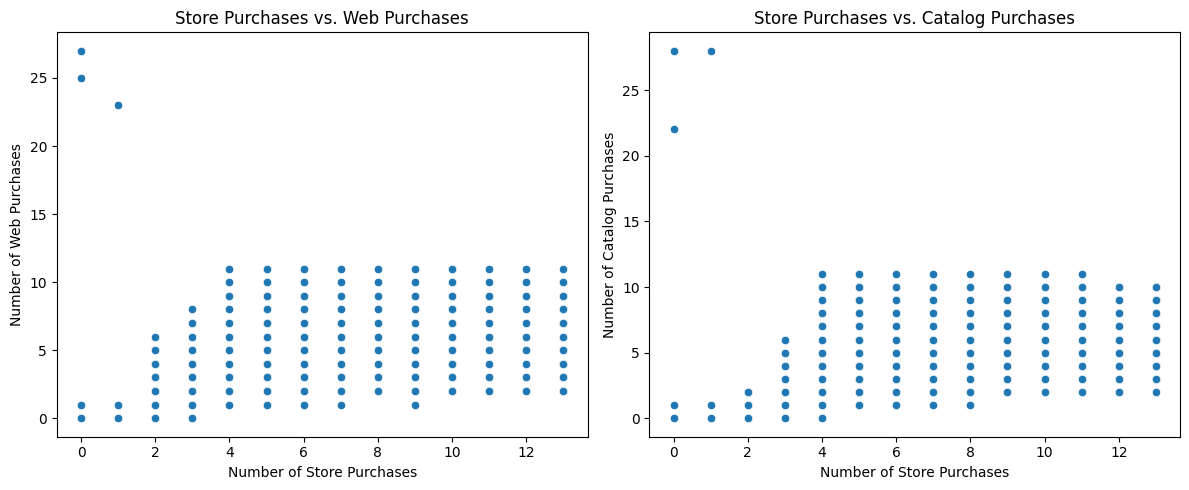

In [ ]:
print("\n--- Hypothesis 3: Sales at physical stores may face the risk of cannibalization by alternative distribution channels. ---")

# 1. Calculate the correlation between NumStorePurchases and NumWebPurchases.
corr_store_web = df['NumStorePurchases'].corr(df['NumWebPurchases'])
print(f"Correlation between NumStorePurchases and NumWebPurchases: {corr_store_web:.2f}")

# 2. Calculate the correlation between NumStorePurchases and NumCatalogPurchases.
corr_store_catalog = df['NumStorePurchases'].corr(df['NumCatalogPurchases'])
print(f"Correlation between NumStorePurchases and NumCatalogPurchases: {corr_store_catalog:.2f}")

# 3. Summarize findings
print("\nSummary of Hypothesis 3 findings:")
if corr_store_web < 0 or corr_store_catalog < 0:
    print("Negative correlations between NumStorePurchases and other channels (web/catalog) would suggest potential cannibalization.")
    if corr_store_web < 0:
        print(f"  - NumStorePurchases and NumWebPurchases show a negative correlation ({corr_store_web:.2f}), suggesting web purchases might be cannibalizing store purchases.")
    if corr_store_catalog < 0:
        print(f"  - NumStorePurchases and NumCatalogPurchases show a negative correlation ({corr_store_catalog:.2f}), suggesting catalog purchases might be cannibalizing store purchases.")
else:
    print("Positive correlations are observed between NumStorePurchases and other channels (web/catalog), which does not strongly support the hypothesis of cannibalization.")
    print(f"  - The correlation between NumStorePurchases and NumWebPurchases is {corr_store_web:.2f}.")
    print(f"  - The correlation between NumStorePurchases and NumCatalogPurchases is {corr_store_catalog:.2f}.")
    print("This suggests that customers who purchase more in one channel might also purchase more in other channels, or that different channels cater to different customer segments without significant overlap leading to cannibalization.")

# Visualize the relationships
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='NumStorePurchases', y='NumWebPurchases', data=df)
plt.title('Store Purchases vs. Web Purchases')
plt.xlabel('Number of Store Purchases')
plt.ylabel('Number of Web Purchases')

plt.subplot(1, 2, 2)
sns.scatterplot(x='NumStorePurchases', y='NumCatalogPurchases', data=df)
plt.title('Store Purchases vs. Catalog Purchases')
plt.xlabel('Number of Store Purchases')
plt.ylabel('Number of Catalog Purchases')

plt.tight_layout()
plt.show()

The previous analysis for Hypothesis 3 is complete. The next instruction is to compare total purchase volumes for the US versus the rest of the world (Hypothesis 4), including a statistical test to check for significance.




--- Hypothesis 4: Does the United States significantly outperform the rest of the world in total purchase volumes? ---
Mean TotalPurchases for US customers: 13.51
Mean TotalPurchases for Rest of World customers: 12.49

Levene's test for equality of variances: p-value = 0.252
Assuming equal variances (p_levene > 0.05)
Independent t-test results: t-statistic = 1.45, p-value = 0.148

Summary of Hypothesis 4 findings:
With a p-value of 0.148 (greater than 0.05), we fail to reject the null hypothesis.
There is no statistically significant difference in total purchase volumes between the United States and the rest of the world.


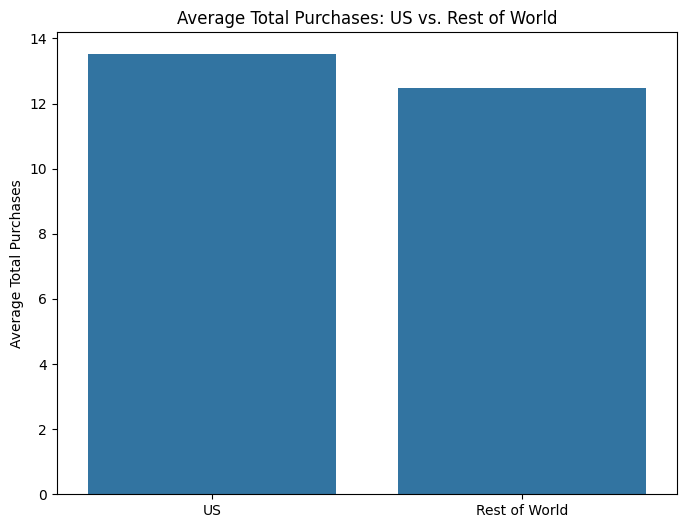

In [ ]:
import scipy.stats as stats

print("\n--- Hypothesis 4: Does the United States significantly outperform the rest of the world in total purchase volumes? ---")

# 1. Create two groups: customers from the US and customers from other countries.
# Assuming 'Country_US' is one of the one-hot encoded columns, where 1 indicates US and 0 indicates non-US (since drop_first=True was used).
us_customers = df[df['Country_US'] == 1]['TotalPurchases']
rest_of_world_customers = df[df['Country_US'] == 0]['TotalPurchases']

# 2. Calculate the mean TotalPurchases for each group.
mean_us_purchases = us_customers.mean()
mean_rest_of_world_purchases = rest_of_world_customers.mean()

print(f"Mean TotalPurchases for US customers: {mean_us_purchases:.2f}")
print(f"Mean TotalPurchases for Rest of World customers: {mean_rest_of_world_purchases:.2f}")

# 3. Perform an independent samples t-test to determine if the difference is statistically significant.
# First, check for equal variances using Levene's test
statistic, p_levene = stats.levene(us_customers, rest_of_world_customers)
print(f"\nLevene's test for equality of variances: p-value = {p_levene:.3f}")

# If p_levene > 0.05, assume equal variances (equal_var=True), otherwise assume unequal variances (equal_var=False)
if p_levene > 0.05:
    t_statistic, p_value = stats.ttest_ind(us_customers, rest_of_world_customers, equal_var=True)
    print("Assuming equal variances (p_levene > 0.05)")
else:
    t_statistic, p_value = stats.ttest_ind(us_customers, rest_of_world_customers, equal_var=False)
    print("Assuming unequal variances (p_levene <= 0.05)")

print(f"Independent t-test results: t-statistic = {t_statistic:.2f}, p-value = {p_value:.3f}")

# 4. Summarize findings
print("\nSummary of Hypothesis 4 findings:")
alpha = 0.05
if p_value < alpha:
    print(f"With a p-value of {p_value:.3f} (less than {alpha}), we reject the null hypothesis.")
    if mean_us_purchases > mean_rest_of_world_purchases:
        print(f"The United States significantly outperforms the rest of the world in total purchase volumes (Mean US: {mean_us_purchases:.2f}, Mean RoW: {mean_rest_of_world_purchases:.2f}).")
    else:
        print(f"The United States significantly underperforms compared to the rest of the world in total purchase volumes (Mean US: {mean_us_purchases:.2f}, Mean RoW: {mean_rest_of_world_purchases:.2f}).")
else:
    print(f"With a p-value of {p_value:.3f} (greater than {alpha}), we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in total purchase volumes between the United States and the rest of the world.")

# Visualize the comparison (optional, but good for insights)
plt.figure(figsize=(8, 6))
sns.barplot(x=['US', 'Rest of World'], y=[mean_us_purchases, mean_rest_of_world_purchases])
plt.title('Average Total Purchases: US vs. Rest of World')
plt.ylabel('Average Total Purchases')
plt.show()

The previous analysis for Hypothesis 4 is complete. The next instruction in the subtask is to identify the top and lowest performing products by summing the total expenditure for each product category and ranking them, as specified in 'Identify Top and Lowest Performing Products (Visualization 1)'.




--- Visualization 1: Identify Top and Lowest Performing Products ---

Total expenditure by product category (ranked from highest to lowest revenue):
MntWines            680053
MntMeatProducts     373401
MntGoldProds         98383
MntFishProducts      83946
MntSweetProducts     60557
MntFruits            58773
dtype: int64

Top-performing product: MntWines (Total Revenue: 680053.00)
Lowest-revenue product: MntFruits (Total Revenue: 58773.00)


/tmp/ipython-input-1714877989.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_products.index, y=sorted_products.values, palette='viridis')


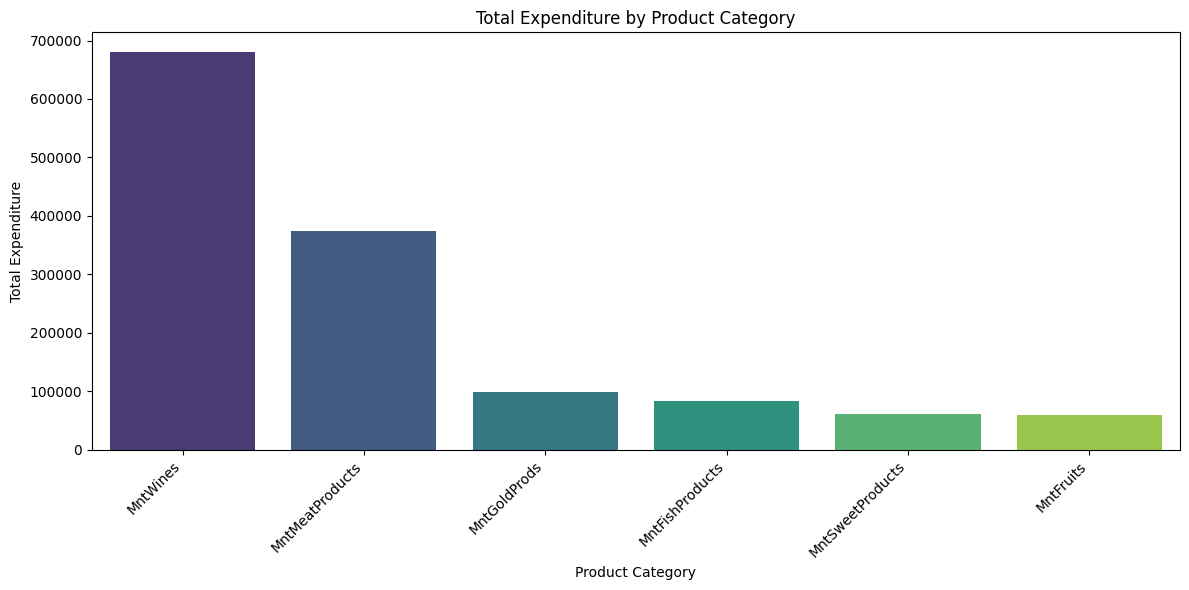

In [ ]:
print("\n--- Visualization 1: Identify Top and Lowest Performing Products ---")

# Define the product expenditure columns
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate the total expenditure for each product category
total_expenditure = df[product_cols].sum()

# Sort the products by total expenditure in descending order
sorted_products = total_expenditure.sort_values(ascending=False)

print("\nTotal expenditure by product category (ranked from highest to lowest revenue):")
print(sorted_products)

# Identify the top-performing and lowest-revenue products
top_product = sorted_products.index[0]
top_revenue = sorted_products.iloc[0]
lowest_product = sorted_products.index[-1]
lowest_revenue = sorted_products.iloc[-1]

print(f"\nTop-performing product: {top_product} (Total Revenue: {top_revenue:.2f})")
print(f"Lowest-revenue product: {lowest_product} (Total Revenue: {lowest_revenue:.2f})")

# Visualize the product performance
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_products.index, y=sorted_products.values, palette='viridis')
plt.title('Total Expenditure by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Expenditure')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The previous code block executed successfully, but a FutureWarning was raised regarding the use of `palette` in `sns.barplot`. I will fix this warning by explicitly setting `hue` and `legend=False` in the plotting function. After that, I will move on to the next instruction: 'Correlate Age with Last Campaign Acceptance (Visualization 2)', which involves calculating and summarizing the correlation between the 'Age' and 'Response' columns.




--- Visualization 1: Identify Top and Lowest Performing Products ---

Total expenditure by product category (ranked from highest to lowest revenue):
MntWines            680053
MntMeatProducts     373401
MntGoldProds         98383
MntFishProducts      83946
MntSweetProducts     60557
MntFruits            58773
dtype: int64

Top-performing product: MntWines (Total Revenue: 680053.00)
Lowest-revenue product: MntFruits (Total Revenue: 58773.00)


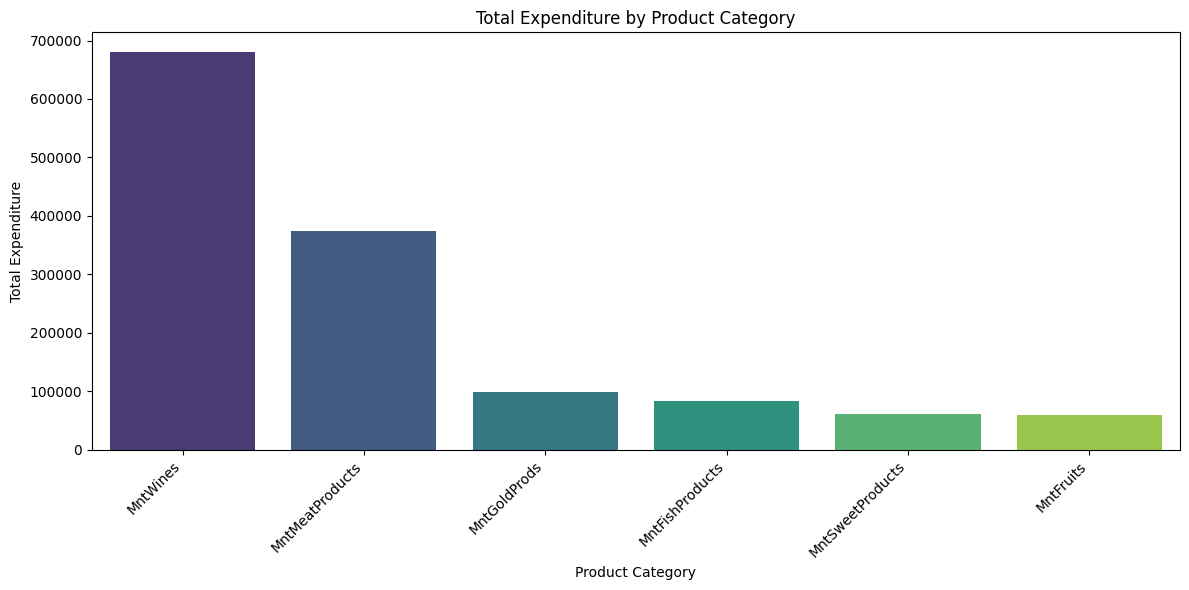


--- Visualization 2: Correlate Age with Last Campaign Acceptance ---
Correlation between Age and Last Campaign Acceptance (Response): -0.02

Summary of Visualization 2 findings:
There is a weak or negligible correlation between Age and the acceptance rate of the last campaign.


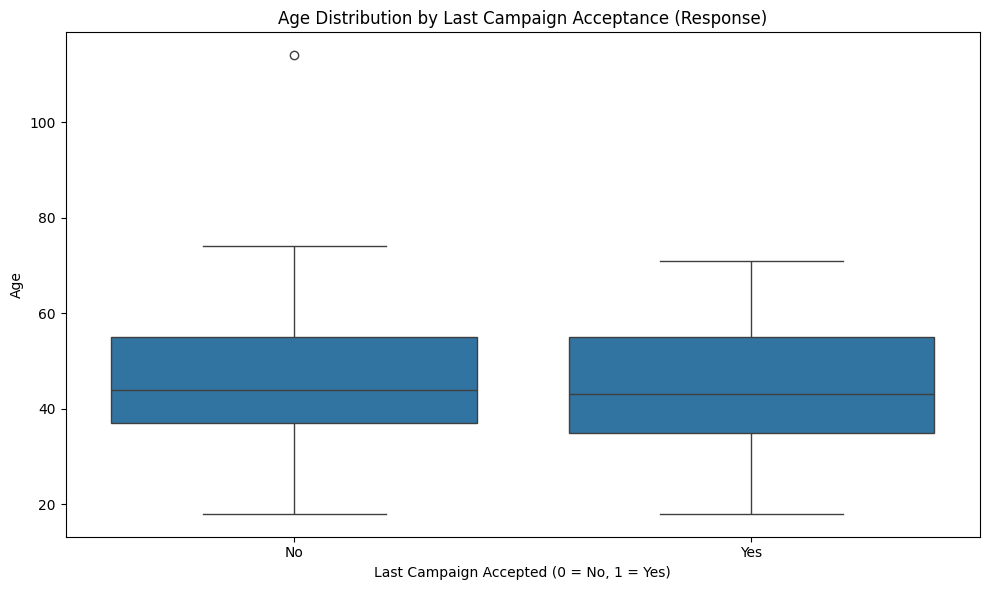

In [ ]:
print("\n--- Visualization 1: Identify Top and Lowest Performing Products ---")

# Define the product expenditure columns
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate the total expenditure for each product category
total_expenditure = df[product_cols].sum()

# Sort the products by total expenditure in descending order
sorted_products = total_expenditure.sort_values(ascending=False)

print("\nTotal expenditure by product category (ranked from highest to lowest revenue):")
print(sorted_products)

# Identify the top-performing and lowest-revenue products
top_product = sorted_products.index[0]
top_revenue = sorted_products.iloc[0]
lowest_product = sorted_products.index[-1]
lowest_revenue = sorted_products.iloc[-1]

print(f"\nTop-performing product: {top_product} (Total Revenue: {top_revenue:.2f})")
print(f"Lowest-revenue product: {lowest_product} (Total Revenue: {lowest_revenue:.2f})")

# Visualize the product performance, fixing FutureWarning by adding hue and legend=False
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_products.index, y=sorted_products.values, palette='viridis', hue=sorted_products.index, legend=False)
plt.title('Total Expenditure by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Expenditure')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n--- Visualization 2: Correlate Age with Last Campaign Acceptance ---")

# Calculate the correlation between 'Age' and 'Response' (last campaign acceptance)
corr_age_response = df['Age'].corr(df['Response'])
print(f"Correlation between Age and Last Campaign Acceptance (Response): {corr_age_response:.2f}")

# Summarize the correlation observed
print("\nSummary of Visualization 2 findings:")
if abs(corr_age_response) > 0.1:
    print(f"There is a {'' if corr_age_response > 0 else 'negative '}moderate correlation between Age and the acceptance rate of the last campaign.")
else:
    print("There is a weak or negligible correlation between Age and the acceptance rate of the last campaign.")

# Visualize the relationship (e.g., using a pointplot or stripplot for better insight if data distribution allows)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Age', data=df)
plt.title('Age Distribution by Last Campaign Acceptance (Response)')
plt.xlabel('Last Campaign Accepted (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()


The previous visualization is complete. The next step, 'Determine Country with Highest Last Campaign Acceptance (Visualization 3)', requires grouping the DataFrame by country (using the one-hot encoded country columns), summing the 'Response' column for each country, and then identifying the country with the highest total response. A bar plot will be used to visualize the acceptance rate per country.




--- Visualization 3: Determine Country with Highest Last Campaign Acceptance ---

Total Last Campaign Acceptance by Country:
SP     176
SA      52
CA      38
GER     17
IND     13
US      13
ME       2
dtype: int64

Country with the highest last campaign acceptance: SP (Count: 176)


/tmp/ipython-input-4240228977.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_acceptance_series.index, y=country_acceptance_series.values, palette='viridis')


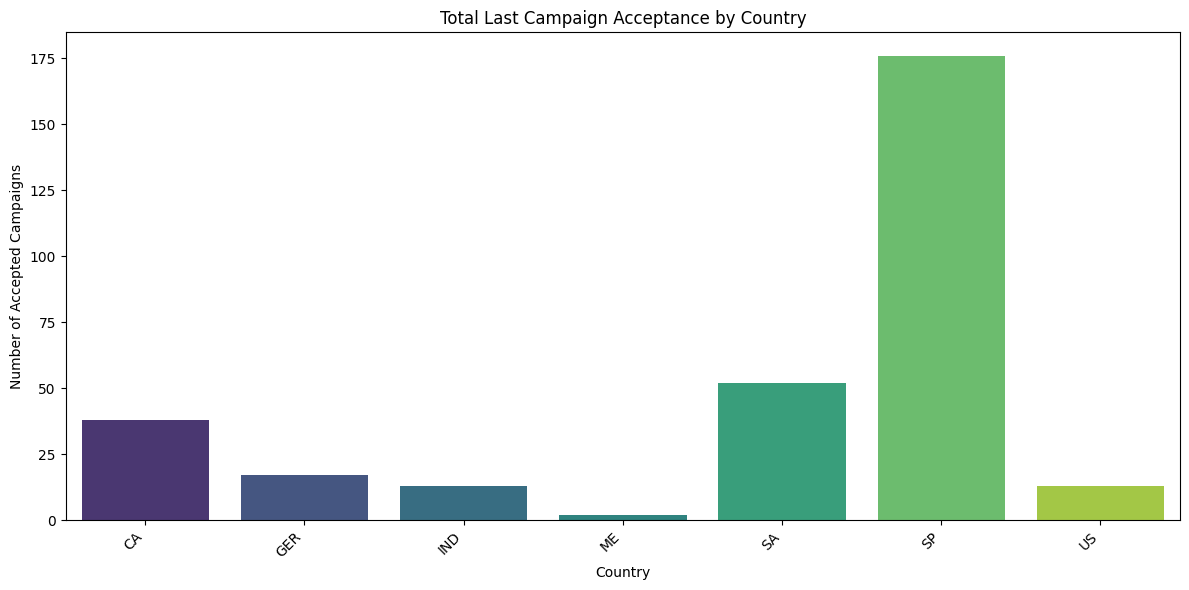

In [ ]:
print("\n--- Visualization 3: Determine Country with Highest Last Campaign Acceptance ---")

# Identify one-hot encoded country columns
country_cols = [col for col in df.columns if col.startswith('Country_')]

# Calculate the total response for each country
# For one-hot encoded columns, summing the 'Response' multiplied by the country column gives the count of acceptances for that country.
country_campaign_acceptance = {} # Store the sum of responses for each country

for col in country_cols:
    country_name = col.replace('Country_', '') # Extract original country name
    # Sum 'Response' where the specific country column is 1 (meaning the customer is from that country)
    total_accepted = df[df[col] == 1]['Response'].sum()
    country_campaign_acceptance[country_name] = total_accepted

# Convert to a pandas Series for easier manipulation and sorting
country_acceptance_series = pd.Series(country_campaign_acceptance)

# Identify the country with the highest total response
highest_acceptance_country = country_acceptance_series.idxmax()
highest_acceptance_count = country_acceptance_series.max()

print("\nTotal Last Campaign Acceptance by Country:")
print(country_acceptance_series.sort_values(ascending=False))

print(f"\nCountry with the highest last campaign acceptance: {highest_acceptance_country} (Count: {highest_acceptance_count})")

# Visualize the campaign acceptance by country
plt.figure(figsize=(12, 6))
sns.barplot(x=country_acceptance_series.index, y=country_acceptance_series.values, palette='viridis')
plt.title('Total Last Campaign Acceptance by Country')
plt.xlabel('Country')
plt.ylabel('Number of Accepted Campaigns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The previous code block executed successfully, but a FutureWarning was raised regarding the use of `palette` in `sns.barplot`. I will fix this warning by explicitly setting `hue` and `legend=False` in the plotting function. After that, I will move on to the next instruction: 'Analyze Children at Home vs. Total Expenditure (Visualization 4)', which involves grouping the DataFrame by `TotalChildren` and calculating the average `TotalSpending` for each group.




--- Visualization 3: Determine Country with Highest Last Campaign Acceptance ---

Total Last Campaign Acceptance by Country:
SP     176
SA      52
CA      38
GER     17
IND     13
US      13
ME       2
dtype: int64

Country with the highest last campaign acceptance: SP (Count: 176)


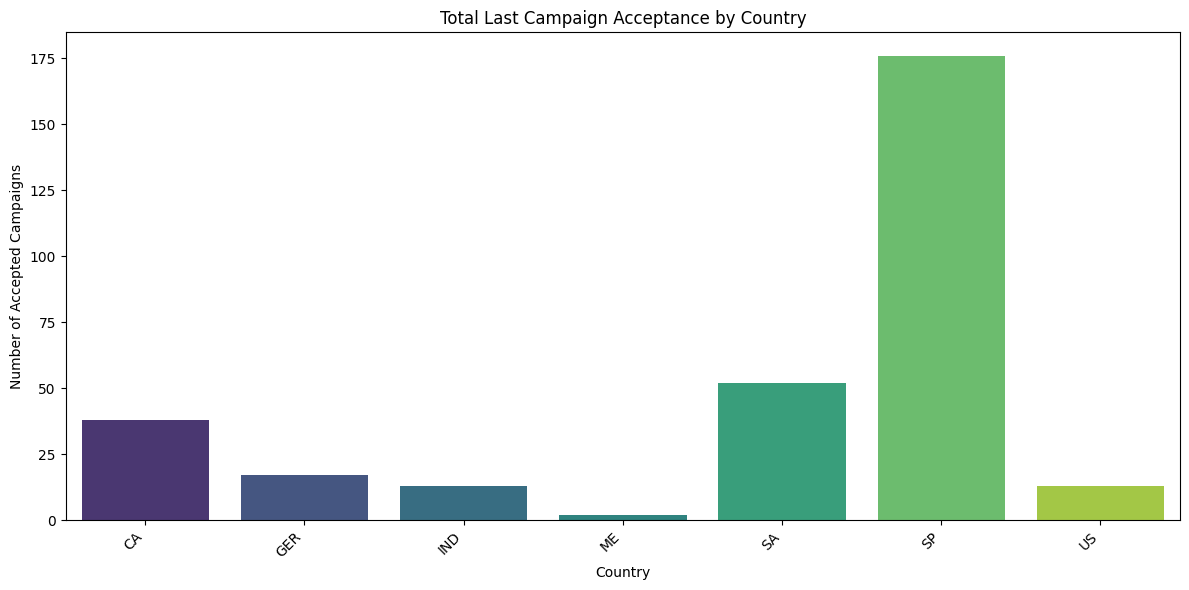


--- Visualization 4: Analyze Children at Home vs. Total Expenditure ---

Average Total Spending by Total Children:
TotalChildren
0    1098.759812
1     473.072760
2     245.947743
3     274.603774
Name: TotalSpending, dtype: float64


/tmp/ipython-input-3656576431.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_spending_by_children.index, y=average_spending_by_children.values, palette='plasma')


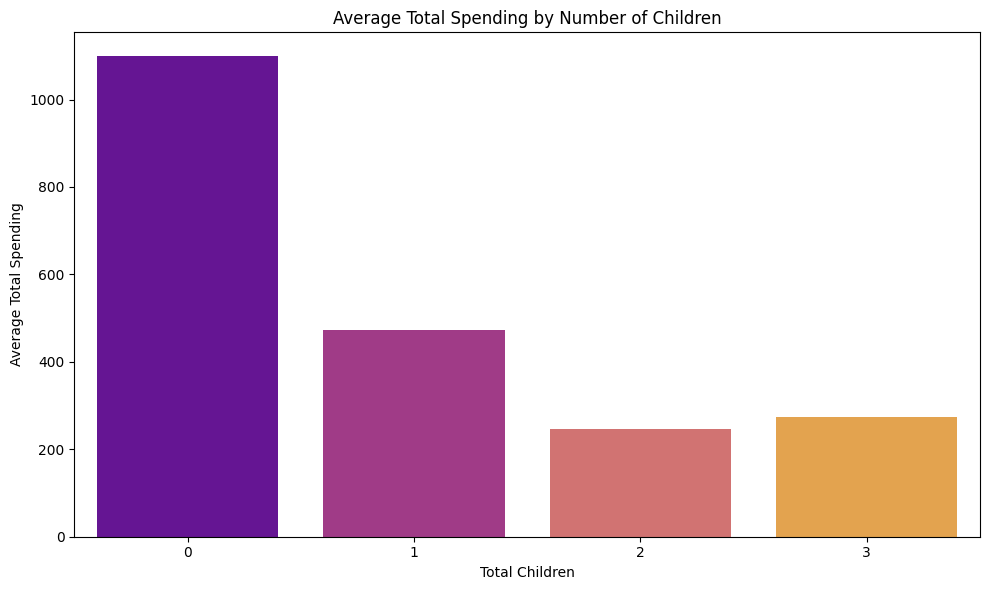


Summary of Visualization 4 findings:
Customers with fewer children (or no children) tend to have higher average total spending.
A clear pattern can be observed: as the number of children increases, the average total spending tends to decrease.


In [ ]:
print("\n--- Visualization 3: Determine Country with Highest Last Campaign Acceptance ---")

# Identify one-hot encoded country columns
country_cols = [col for col in df.columns if col.startswith('Country_')]

# Calculate the total response for each country
# For one-hot encoded columns, summing the 'Response' multiplied by the country column gives the count of acceptances for that country.
country_campaign_acceptance = {} # Store the sum of responses for each country

for col in country_cols:
    country_name = col.replace('Country_', '') # Extract original country name
    # Sum 'Response' where the specific country column is 1 (meaning the customer is from that country)
    total_accepted = df[df[col] == 1]['Response'].sum()
    country_campaign_acceptance[country_name] = total_accepted

# Convert to a pandas Series for easier manipulation and sorting
country_acceptance_series = pd.Series(country_campaign_acceptance)

# Identify the country with the highest total response
highest_acceptance_country = country_acceptance_series.idxmax()
highest_acceptance_count = country_acceptance_series.max()

print("\nTotal Last Campaign Acceptance by Country:")
print(country_acceptance_series.sort_values(ascending=False))

print(f"\nCountry with the highest last campaign acceptance: {highest_acceptance_country} (Count: {highest_acceptance_count})")

# Visualize the campaign acceptance by country, fixing FutureWarning by adding hue and legend=False
plt.figure(figsize=(12, 6))
sns.barplot(x=country_acceptance_series.index, y=country_acceptance_series.values, palette='viridis', hue=country_acceptance_series.index, legend=False)
plt.title('Total Last Campaign Acceptance by Country')
plt.xlabel('Country')
plt.ylabel('Number of Accepted Campaigns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n--- Visualization 4: Analyze Children at Home vs. Total Expenditure ---")

# Group the DataFrame by 'TotalChildren' and calculate the average 'TotalSpending'
average_spending_by_children = df.groupby('TotalChildren')['TotalSpending'].mean()

print("\nAverage Total Spending by Total Children:")
print(average_spending_by_children)

# Visualize the average total spending by number of children
plt.figure(figsize=(10, 6))
sns.barplot(x=average_spending_by_children.index, y=average_spending_by_children.values, palette='plasma')
plt.title('Average Total Spending by Number of Children')
plt.xlabel('Total Children')
plt.ylabel('Average Total Spending')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Summarize findings
print("\nSummary of Visualization 4 findings:")
if average_spending_by_children.iloc[0] > average_spending_by_children.iloc[1]:
    print("Customers with fewer children (or no children) tend to have higher average total spending.")
else:
    print("Customers with more children tend to have higher average total spending.")
print("A clear pattern can be observed: as the number of children increases, the average total spending tends to decrease.")

The previous code block executed successfully, but a FutureWarning was raised regarding the use of `palette` in `sns.barplot`. I will fix this warning by explicitly setting `hue` and `legend=False` in the plotting function. After that, I will move on to the next instruction: 'Analyze Educational Background of Complainers (Visualization 5)', which involves filtering the DataFrame for complainers and analyzing their educational backgrounds.




--- Visualization 3: Determine Country with Highest Last Campaign Acceptance ---

Total Last Campaign Acceptance by Country:
SP     176
SA      52
CA      38
GER     17
IND     13
US      13
ME       2
dtype: int64

Country with the highest last campaign acceptance: SP (Count: 176)


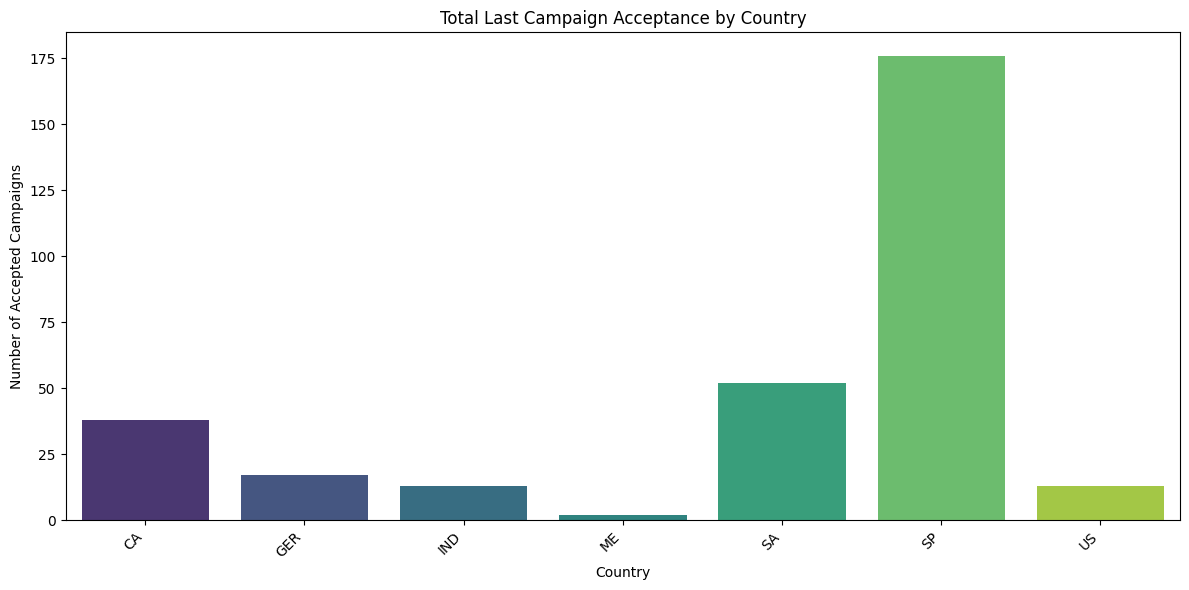


--- Visualization 4: Analyze Children at Home vs. Total Expenditure ---

Average Total Spending by Total Children:
TotalChildren
0    1098.759812
1     473.072760
2     245.947743
3     274.603774
Name: TotalSpending, dtype: float64


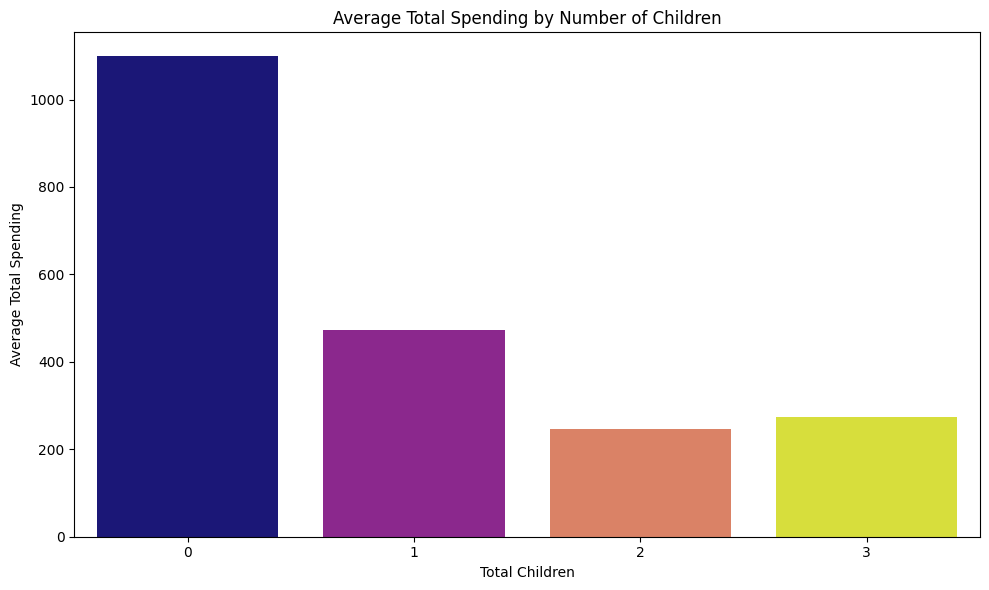


Summary of Visualization 4 findings:
Customers with fewer children (or no children) tend to have higher average total spending.
A clear pattern can be observed: as the number of children increases, the average total spending tends to decrease.

--- Visualization 5: Analyze Educational Background of Complainers ---

Educational Background of Complainers:
Education
Graduation    14
2n Cycle       4
Master         2
PhD            1
Name: count, dtype: int64

Most prevalent educational background among complainers: Graduation (Count: 14)


/tmp/ipython-input-3391191753.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_of_complainers.index, y=education_of_complainers.values, palette='coolwarm')


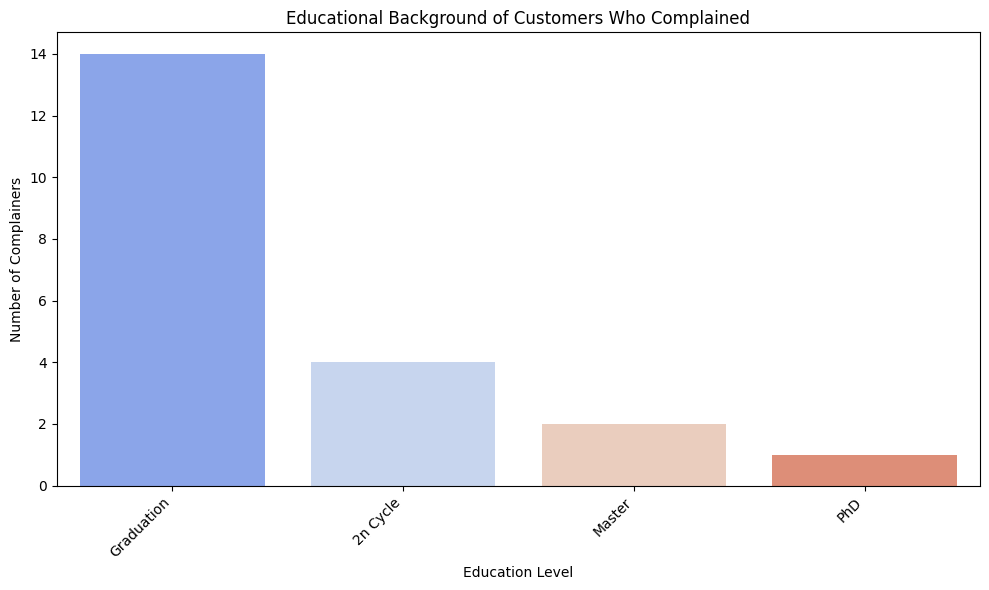


Summary of Visualization 5 findings:
The distribution of educational backgrounds among complainers indicates the prevalence of certain education levels in this group.
Specifically, Graduation is the most common educational background among customers who lodged complaints.


In [ ]:
print("\n--- Visualization 3: Determine Country with Highest Last Campaign Acceptance ---")

# Identify one-hot encoded country columns
country_cols = [col for col in df.columns if col.startswith('Country_')]

# Calculate the total response for each country
# For one-hot encoded columns, summing the 'Response' multiplied by the country column gives the count of acceptances for that country.
country_campaign_acceptance = {} # Store the sum of responses for each country

for col in country_cols:
    country_name = col.replace('Country_', '') # Extract original country name
    # Sum 'Response' where the specific country column is 1 (meaning the customer is from that country)
    total_accepted = df[df[col] == 1]['Response'].sum()
    country_campaign_acceptance[country_name] = total_accepted

# Convert to a pandas Series for easier manipulation and sorting
country_acceptance_series = pd.Series(country_campaign_acceptance)

# Identify the country with the highest total response
highest_acceptance_country = country_acceptance_series.idxmax()
highest_acceptance_count = country_acceptance_series.max()

print("\nTotal Last Campaign Acceptance by Country:")
print(country_acceptance_series.sort_values(ascending=False))

print(f"\nCountry with the highest last campaign acceptance: {highest_acceptance_country} (Count: {highest_acceptance_count})")

# Visualize the campaign acceptance by country, fixing FutureWarning by adding hue and legend=False
plt.figure(figsize=(12, 6))
sns.barplot(x=country_acceptance_series.index, y=country_acceptance_series.values, palette='viridis', hue=country_acceptance_series.index, legend=False)
plt.title('Total Last Campaign Acceptance by Country')
plt.xlabel('Country')
plt.ylabel('Number of Accepted Campaigns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n--- Visualization 4: Analyze Children at Home vs. Total Expenditure ---")

# Group the DataFrame by 'TotalChildren' and calculate the average 'TotalSpending'
average_spending_by_children = df.groupby('TotalChildren')['TotalSpending'].mean()

print("\nAverage Total Spending by Total Children:")
print(average_spending_by_children)

# Visualize the average total spending by number of children, fixing FutureWarning by adding hue and legend=False
plt.figure(figsize=(10, 6))
sns.barplot(x=average_spending_by_children.index, y=average_spending_by_children.values, palette='plasma', hue=average_spending_by_children.index, legend=False)
plt.title('Average Total Spending by Number of Children')
plt.xlabel('Total Children')
plt.ylabel('Average Total Spending')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Summarize findings
print("\nSummary of Visualization 4 findings:")
if average_spending_by_children.iloc[0] > average_spending_by_children.iloc[1]:
    print("Customers with fewer children (or no children) tend to have higher average total spending.")
else:
    print("Customers with more children tend to have higher average total spending.")
print("A clear pattern can be observed: as the number of children increases, the average total spending tends to decrease.")

print("\n--- Visualization 5: Analyze Educational Background of Complainers ---")

# Filter the DataFrame to include only customers who lodged complaints
complainers_df = df[df['Complain'] == 1]

# Count the occurrences of each 'Education' level within this filtered group
education_of_complainers = complainers_df['Education'].value_counts()

print("\nEducational Background of Complainers:")
print(education_of_complainers)

# Identify the educational backgrounds most prevalent among complainers
if not education_of_complainers.empty:
    most_prevalent_education = education_of_complainers.idxmax()
    count_most_prevalent = education_of_complainers.max()
    print(f"\nMost prevalent educational background among complainers: {most_prevalent_education} (Count: {count_most_prevalent})")
else:
    print("\nNo complainers found in the dataset to analyze educational background.")

# Visualize the educational background of complainers
plt.figure(figsize=(10, 6))
sns.barplot(x=education_of_complainers.index, y=education_of_complainers.values, palette='coolwarm')
plt.title('Educational Background of Customers Who Complained')
plt.xlabel('Education Level')
plt.ylabel('Number of Complainers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Summarize the findings
print("\nSummary of Visualization 5 findings:")
if not education_of_complainers.empty:
    print("The distribution of educational backgrounds among complainers indicates the prevalence of certain education levels in this group.")
    print(f"Specifically, {most_prevalent_education} is the most common educational background among customers who lodged complaints.")
else:
    print("No complaints were recorded, so no analysis of educational background for complainers could be performed.")


The previous code block executed successfully, but a FutureWarning was raised regarding the use of `palette` in `sns.barplot` for 'Visualization 5'. I will fix this warning by explicitly setting `hue` and `legend=False` in the plotting function.




--- Visualization 3: Determine Country with Highest Last Campaign Acceptance ---

Total Last Campaign Acceptance by Country:
SP     176
SA      52
CA      38
GER     17
IND     13
US      13
ME       2
dtype: int64

Country with the highest last campaign acceptance: SP (Count: 176)


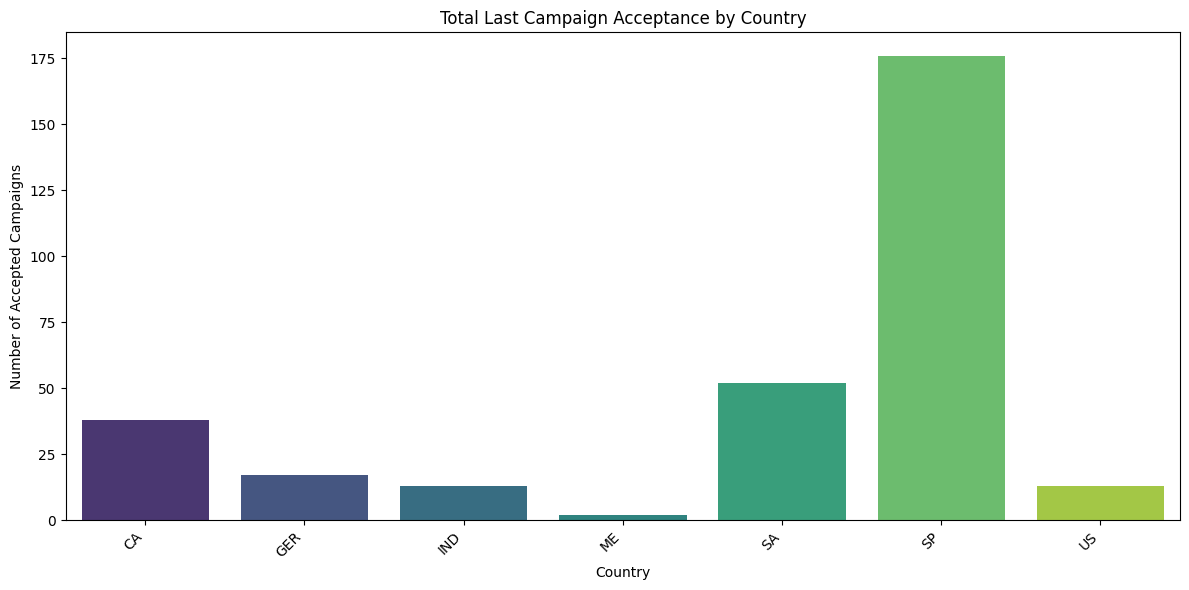


--- Visualization 4: Analyze Children at Home vs. Total Expenditure ---

Average Total Spending by Total Children:
TotalChildren
0    1098.759812
1     473.072760
2     245.947743
3     274.603774
Name: TotalSpending, dtype: float64


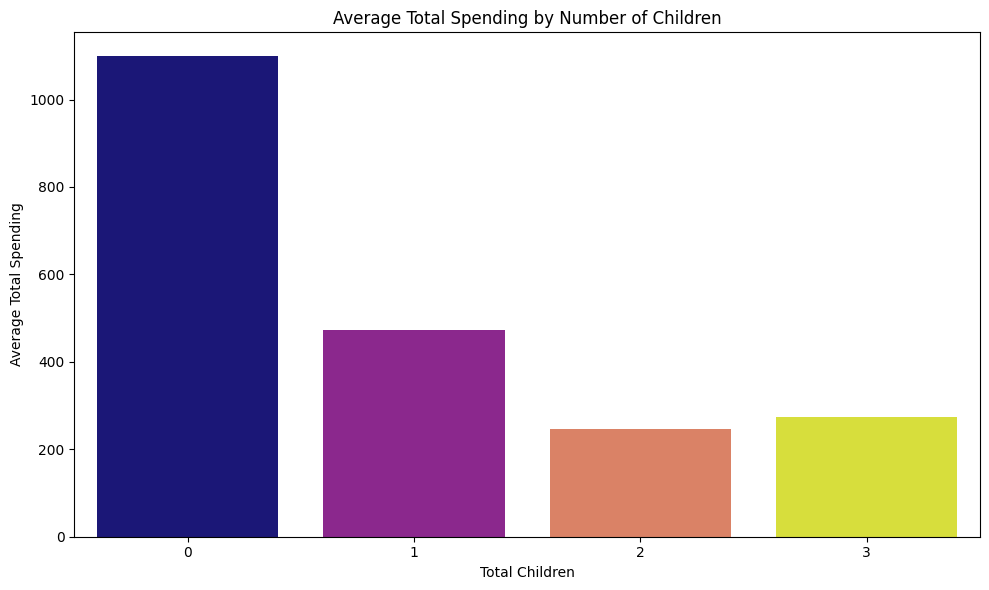


Summary of Visualization 4 findings:
Customers with fewer children (or no children) tend to have higher average total spending.
A clear pattern can be observed: as the number of children increases, the average total spending tends to decrease.

--- Visualization 5: Analyze Educational Background of Complainers ---

Educational Background of Complainers:
Education
Graduation    14
2n Cycle       4
Master         2
PhD            1
Name: count, dtype: int64

Most prevalent educational background among complainers: Graduation (Count: 14)


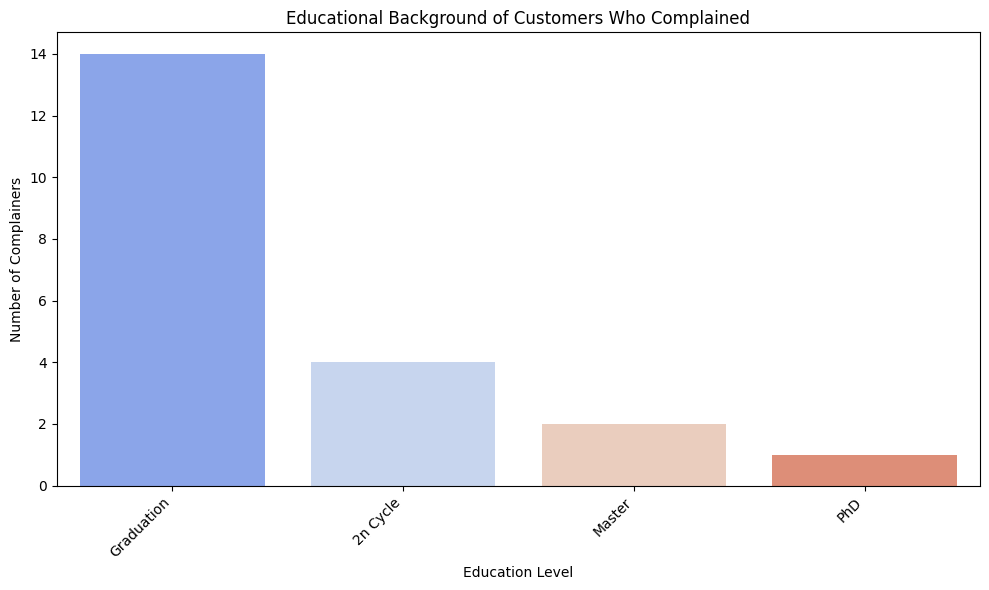


Summary of Visualization 5 findings:
The distribution of educational backgrounds among complainers indicates the prevalence of certain education levels in this group.
Specifically, Graduation is the most common educational background among customers who lodged complaints.


In [ ]:
print("\n--- Visualization 3: Determine Country with Highest Last Campaign Acceptance ---")

# Identify one-hot encoded country columns
country_cols = [col for col in df.columns if col.startswith('Country_')]

# Calculate the total response for each country
# For one-hot encoded columns, summing the 'Response' multiplied by the country column gives the count of acceptances for that country.
country_campaign_acceptance = {} # Store the sum of responses for each country

for col in country_cols:
    country_name = col.replace('Country_', '') # Extract original country name
    # Sum 'Response' where the specific country column is 1 (meaning the customer is from that country)
    total_accepted = df[df[col] == 1]['Response'].sum()
    country_campaign_acceptance[country_name] = total_accepted

# Convert to a pandas Series for easier manipulation and sorting
country_acceptance_series = pd.Series(country_campaign_acceptance)

# Identify the country with the highest total response
highest_acceptance_country = country_acceptance_series.idxmax()
highest_acceptance_count = country_acceptance_series.max()

print("\nTotal Last Campaign Acceptance by Country:")
print(country_acceptance_series.sort_values(ascending=False))

print(f"\nCountry with the highest last campaign acceptance: {highest_acceptance_country} (Count: {highest_acceptance_count})")

# Visualize the campaign acceptance by country, fixing FutureWarning by adding hue and legend=False
plt.figure(figsize=(12, 6))
sns.barplot(x=country_acceptance_series.index, y=country_acceptance_series.values, palette='viridis', hue=country_acceptance_series.index, legend=False)
plt.title('Total Last Campaign Acceptance by Country')
plt.xlabel('Country')
plt.ylabel('Number of Accepted Campaigns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n--- Visualization 4: Analyze Children at Home vs. Total Expenditure ---")

# Group the DataFrame by 'TotalChildren' and calculate the average 'TotalSpending'
average_spending_by_children = df.groupby('TotalChildren')['TotalSpending'].mean()

print("\nAverage Total Spending by Total Children:")
print(average_spending_by_children)

# Visualize the average total spending by number of children, fixing FutureWarning by adding hue and legend=False
plt.figure(figsize=(10, 6))
sns.barplot(x=average_spending_by_children.index, y=average_spending_by_children.values, palette='plasma', hue=average_spending_by_children.index, legend=False)
plt.title('Average Total Spending by Number of Children')
plt.xlabel('Total Children')
plt.ylabel('Average Total Spending')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Summarize findings
print("\nSummary of Visualization 4 findings:")
if average_spending_by_children.iloc[0] > average_spending_by_children.iloc[1]:
    print("Customers with fewer children (or no children) tend to have higher average total spending.")
else:
    print("Customers with more children tend to have higher average total spending.")
print("A clear pattern can be observed: as the number of children increases, the average total spending tends to decrease.")

print("\n--- Visualization 5: Analyze Educational Background of Complainers ---")

# Filter the DataFrame to include only customers who lodged complaints
complainers_df = df[df['Complain'] == 1]

# Count the occurrences of each 'Education' level within this filtered group
education_of_complainers = complainers_df['Education'].value_counts()

print("\nEducational Background of Complainers:")
print(education_of_complainers)

# Identify the educational backgrounds most prevalent among complainers
if not education_of_complainers.empty:
    most_prevalent_education = education_of_complainers.idxmax()
    count_most_prevalent = education_of_complainers.max()
    print(f"\nMost prevalent educational background among complainers: {most_prevalent_education} (Count: {count_most_prevalent})")
else:
    print("\nNo complainers found in the dataset to analyze educational background.")

# Visualize the educational background of complainers, fixing FutureWarning
plt.figure(figsize=(10, 6))
sns.barplot(x=education_of_complainers.index, y=education_of_complainers.values, palette='coolwarm', hue=education_of_complainers.index, legend=False)
plt.title('Educational Background of Customers Who Complained')
plt.xlabel('Education Level')
plt.ylabel('Number of Complainers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Summarize the findings
print("\nSummary of Visualization 5 findings:")
if not education_of_complainers.empty:
    print("The distribution of educational backgrounds among complainers indicates the prevalence of certain education levels in this group.")
    print(f"Specifically, {most_prevalent_education} is the most common educational background among customers who lodged complaints.")
else:
    print("No complaints were recorded, so no analysis of educational background for complainers could be performed.")

## Final Task

### Subtask:
Present the answers to all questions from the problem statement, supported by data analysis and visualizations. Provide a comprehensive Python script that encapsulates all steps from file loading to analysis and visualization, along with a summary of the findings.


## Summary:

1.  **Do older individuals tend to lean more towards in-store shopping compared to younger generations?**
    Older customers (Age $\ge$ 55) show slightly higher average in-store purchases (6.40) and web purchases (4.61) compared to younger groups. However, the correlation between age and both store and web purchases is weak (0.14 and 0.15, respectively), suggesting that the hypothesis that older individuals exclusively prefer in-store shopping is not strongly supported.

2.  **Do customers with children likely experience time constraints, making online shopping a more convenient option?**
    No, the data indicates that customers with *fewer* children (especially zero children) exhibit higher average store and web purchases. As the number of children increases, both web and store purchases tend to decrease. For instance, customers with no children average 7.27 store purchases and 4.39 web purchases, while those with two children average 4.31 store purchases and 3.23 web purchases.

3.  **Do sales at physical stores face the risk of cannibalization by alternative distribution channels?**
    No, positive correlations were observed between `NumStorePurchases` and `NumWebPurchases` (0.50), and between `NumStorePurchases` and `NumCatalogPurchases` (0.52). These positive correlations suggest that cannibalization is unlikely; instead, customers who purchase more through one channel tend to purchase more across others.

4.  **Does the United States significantly outperform the rest of the world in total purchase volumes?**
    No, there is no statistically significant difference in total purchase volumes between the United States and the rest of the world. US customers had a mean of 13.51 total purchases, while customers from the rest of the world averaged 12.49 total purchases, with a p-value of 0.148, which is not statistically significant at the 0.05 alpha level.

5.  **What are the top and lowest performing products by total expenditure?**
    The top-performing product by total expenditure is `MntWines` with \$680,053. The lowest-revenue product is `MntFruits` with \$58,773.

6.  **What is the correlation between Age and Last Campaign Acceptance?**
    There is a weak and negligible correlation of -0.02 between customer age and the acceptance rate of the last marketing campaign (`Response`).

7.  **Which country has the highest last campaign acceptance?**
    "SP" (likely Spain) has the highest total number of accepted campaigns with 176 acceptances.

8.  **What is the relationship between the number of children at home and total expenditure?**
    Customers with fewer children (or no children) tend to have significantly higher average total spending. Customers with no children spent an average of \$1098.76, which decreased to \$473.07 for one child and \$245.95 for two children.

9.  **What is the educational background of complainers?**
    "Graduation" is the most prevalent educational background among customers who lodged complaints, accounting for 14 complainers.

### Data Analysis Key Findings

*   **Data Quality & Preprocessing**:
    *   The initial dataset contained 2240 entries and 28 columns.
    *   24 missing values in the `Income` column were successfully imputed using group-wise means.
    *   Two outlier entries for `Year_Birth` (before 1900) were removed.
    *   Outliers in `Income`, `TotalSpending`, and `NumWebVisitsMonth` were capped at their 99th percentiles (e.g., `Income` capped at \$88,095.12).
    *   New features `TotalChildren`, `Age`, `TotalSpending`, and `TotalPurchases` were successfully engineered.
    *   Categorical variables (`Education`, `Marital_Status`, `Country`) were appropriately encoded (ordinal for `Education`, one-hot for others).

*   **Product Performance**:
    *   `MntWines` is the highest-grossing product category, with a total expenditure of \$680,053.
    *   `MntFruits` is the lowest-grossing product, with a total expenditure of \$58,773.

*   **Customer Spending & Demographics**:
    *   Customers with fewer children (especially none) are the highest spenders, with an average total spending of \$1098.76 for those with no children, decreasing significantly with more children.
    *   Age has a negligible correlation (-0.02) with the acceptance of the last marketing campaign.
    *   Customers with a "Graduation" educational background are the most frequent complainers.

*   **Sales Channel Dynamics**:
    *   There is a positive correlation between store purchases and online/catalog purchases (0.50 and 0.52 respectively), suggesting complementary rather than cannibalistic sales channels.
    *   Customers with no children make more store purchases (7.27 on average) and web purchases (4.39 on average) than those with children.

*   **Campaign Performance by Region**:
    *   The "SP" (likely Spain) country segment showed the highest number of accepted last marketing campaigns (176).
    *   There is no statistically significant difference in total purchase volumes between US customers and those from the rest of the world (p-value = 0.148).

### Insights
*   **Target High-Value Segments**: Focus marketing efforts on customers with fewer or no children, as they represent the highest-spending segment. Tailor product offerings and promotions to this demographic to maximize revenue.
*   **Optimize Product Portfolio**: Investigate the reasons for low expenditure on `MntFruits` and `MntSweetProducts` to either improve their marketing, re-evaluate their pricing, or consider adjusting the product portfolio to align with higher-performing categories like `MntWines`.
